In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import YearLocator, DateFormatter
from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
sf_incident = pd.read_csv("/content/drive/MyDrive/DATA240/project/1 - Incident_SF_Merged.csv")

<ipython-input-54-61601576a4ef>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_incident = pd.read_csv("/content/drive/MyDrive/DATA240/project/1 - Incident_SF_Merged.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sf_incident.head()

Incident Datetime Incident Date Incident Time  Incident Year  \
0  2004-11-22 17:50:00    2004-11-22      17:50:00           2004   
1  2011-02-18 05:27:00    2011-02-18      05:27:00           2011   
2  2010-11-21 17:00:00    2010-11-21      17:00:00           2010   
3  2013-04-02 15:50:00    2013-04-02      15:50:00           2013   
4  2017-08-06 18:15:00    2017-08-06      18:15:00           2017   

  Incident Day of Week  Incident Code Incident Category Incident Subcategory  \
0               Monday           3074           Robbery                  NaN   
1               Friday          26030             Arson                  NaN   
2               Sunday           4134           Assault                  NaN   
3              Tuesday           4134           Assault                  NaN   
4               Sunday           4134           Assault                  NaN   

    Incident Description Resolution            Intersection   Latitude  \
0  ROBBERY, BODILY FORCE       NONE   GENEVA AV / SANTOS ST  37.708311   
1                  ARSON       NONE   0 Block of SANJUAN AV  37.724377   
2                BATTERY       NONE    400 Block of 10TH ST  37.770913   
3                BATTERY       NONE   14TH AV / SANTIAGO ST  37.745158   
4                BATTERY       NONE  800 Block of BRYANT ST  37.775421   

    Longitude                                         Point  \
0 -122.420084    POINT (-122.420084075249 37.7083109744362)   
1 -122.436220  POINT (-122.43622001281001 37.7243766140428)   
2 -122.410541    POINT (-122.410541166987 37.7709130566165)   
3 -122.470366      POINT (-122.470365997562 37.74515794927)   
4 -122.403405   POINT (-122.40340479147905 37.775420706711)   

    Neighborhood Name  Unemployment Rate  Inflation Rate  Median Housing Price  
0   Visitacion Valley                5.7        3.598972          6.920993e+05  
1       Outer Mission                8.6        2.188184          6.399353e+05  
2     South of Market                9.1        1.095290          6.591249e+05  
3  West of Twin Peaks                5.3        1.029866          7.644564e+05  
4     South of Market                3.2        1.968504          1.186506e+06

In [ ]:
sf_incident.describe()

Incident Year  Incident Code      Latitude     Longitude  \
count   2.796219e+06   2.796219e+06  2.757972e+06  2.757972e+06   
mean    2.012647e+03   2.679952e+04  3.776819e+01 -1.224232e+02   
std     5.811716e+00   2.593613e+04  2.401755e-02  2.561755e-02   
min     2.003000e+03   0.000000e+00  3.770788e+01 -1.225136e+02   
25%     2.008000e+03   6.244000e+03  3.775400e+01 -1.224334e+02   
50%     2.013000e+03   1.306000e+04  3.777542e+01 -1.224169e+02   
75%     2.018000e+03   6.205000e+04  3.778491e+01 -1.224070e+02   
max     2.023000e+03   7.503000e+04  3.782999e+01 -1.223637e+02   

       Unemployment Rate  Inflation Rate  Median Housing Price  
count       2.796219e+06    2.796219e+06          2.796219e+06  
mean        5.097705e+00    2.497530e+00          9.452558e+05  
std         2.273058e+00    1.901274e+00          2.837951e+05  
min         1.900000e+00   -2.047414e+00          5.594217e+05  
25%         3.300000e+00    1.491146e+00          6.853694e+05  
50%         4.600000e+00    2.108037e+00          8.031732e+05  
75%         6.500000e+00    3.152174e+00          1.248188e+06  
max         1.320000e+01    9.075044e+00          1.488030e+06

In [ ]:
from tabulate import tabulate
statistics = sf_incident[['Unemployment Rate', 'Inflation Rate', 'Median Housing Price']].describe().round(2)
table = tabulate(statistics, headers='keys', tablefmt='pretty', numalign="right")
print(table)

+-------+-------------------+----------------+----------------------+
|       | Unemployment Rate | Inflation Rate | Median Housing Price |
+-------+-------------------+----------------+----------------------+
| count |     2796219.0     |   2796219.0    |      2796219.0       |
| mean  |        5.1        |      2.5       |      945255.82       |
|  std  |       2.27        |      1.9       |      283795.09       |
|  min  |        1.9        |     -2.05      |      559421.75       |
|  25%  |        3.3        |      1.49      |      685369.39       |
|  50%  |        4.6        |      2.11      |      803173.19       |
|  75%  |        6.5        |      3.15      |      1248188.46      |
|  max  |       13.2        |      9.08      |      1488030.22      |
+-------+-------------------+----------------+----------------------+


In [ ]:
sf_incident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2796219 entries, 0 to 2796218
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Incident Datetime     object 
 1   Incident Date         object 
 2   Incident Time         object 
 3   Incident Year         int64  
 4   Incident Day of Week  object 
 5   Incident Code         int64  
 6   Incident Category     object 
 7   Incident Subcategory  object 
 8   Incident Description  object 
 9   Resolution            object 
 10  Intersection          object 
 11  Latitude              float64
 12  Longitude             float64
 13  Point                 object 
 14  Neighborhood Name     object 
 15  Unemployment Rate     float64
 16  Inflation Rate        float64
 17  Median Housing Price  float64
dtypes: float64(5), int64(2), object(11)
memory usage: 384.0+ MB


In [ ]:
sf_incident_ = sf_incident.drop(['Incident Subcategory'], axis = 1)
sf_incident_.isnull().sum()

Incident Datetime           0
Incident Date               0
Incident Time               0
Incident Year               0
Incident Day of Week        0
Incident Code               0
Incident Category           0
Incident Description        0
Resolution                  0
Intersection            38247
Latitude                38247
Longitude               38247
Point                   38247
Neighborhood Name       38247
Unemployment Rate           0
Inflation Rate              0
Median Housing Price        0
dtype: int64

In [ ]:
sf_incident['Incident Datetime'] = pd.to_datetime(sf_incident['Incident Datetime'], errors='coerce')
sf_incident['Incident Date'] = pd.to_datetime(sf_incident['Incident Date'], errors='coerce')
sf_incident['Incident Time'] = pd.to_datetime(sf_incident['Incident Time'], format='%H:%M:%S', errors='coerce')

# Extracting the month, day, and hour from the above columns for later analysis
sf_incident['Incident Month'] = sf_incident['Incident Date'].dt.month
sf_incident['Incident Day'] = sf_incident['Incident Date'].dt.day
sf_incident['Incident Hour'] = sf_incident['Incident Time'].dt.hour

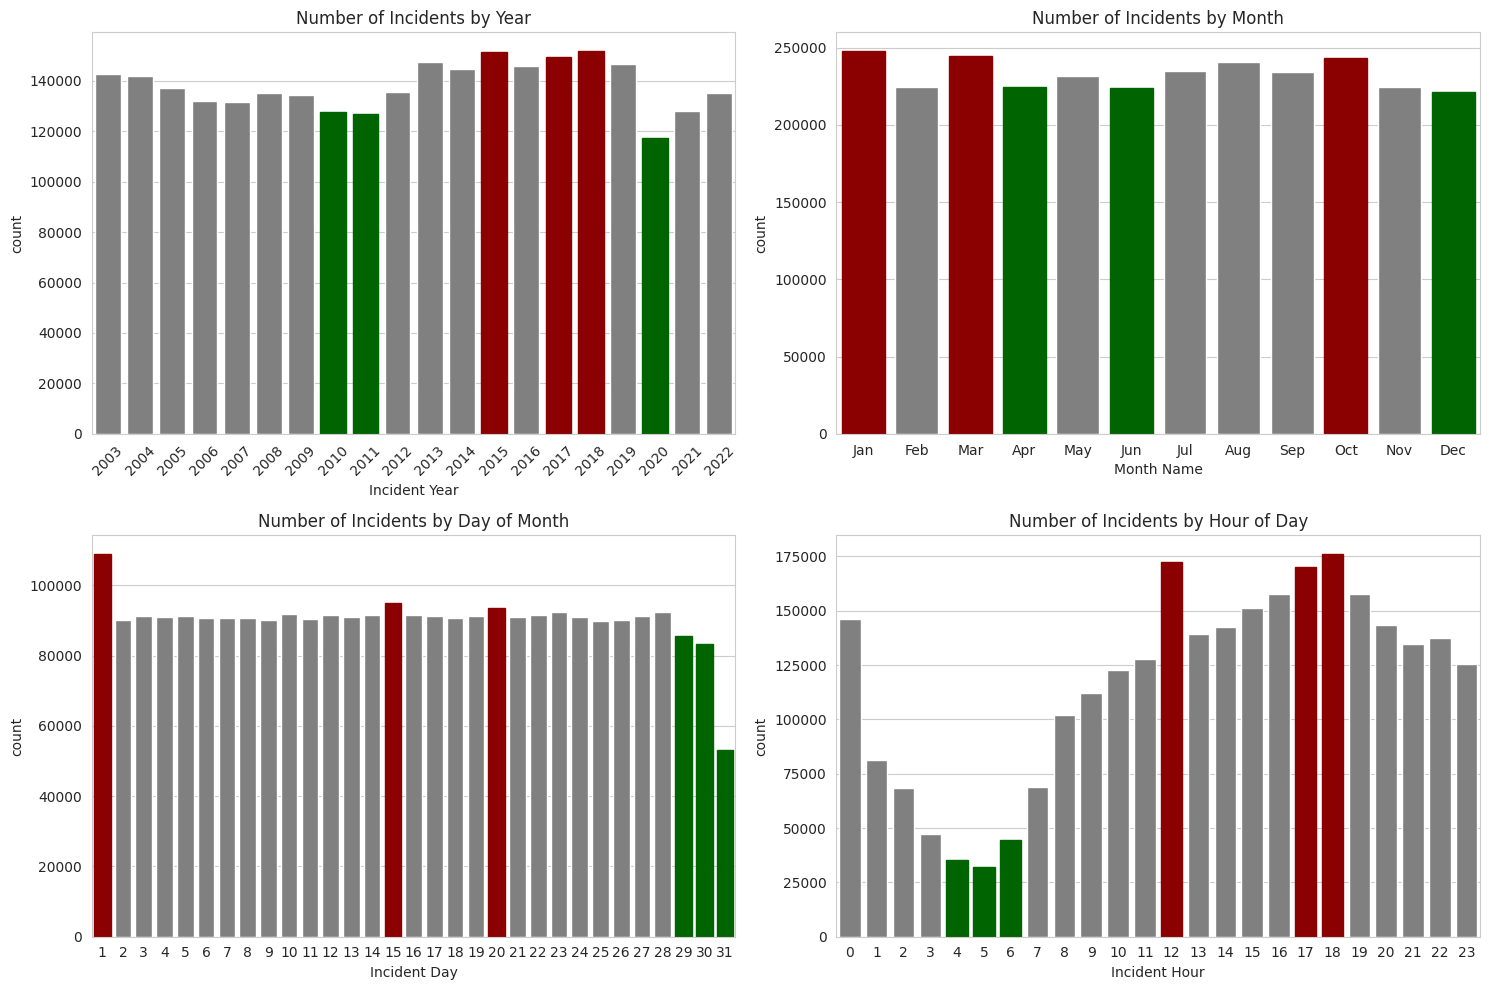

In [ ]:
# Visualizing the number of incidents by year, month, day, hour

sns.set_style("whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Function to color top 3 bars in red and bottom 3 bars in green
def color_top_bottom_3_bars(ax):
    # Getting the heights of the bars
    heights = [p.get_height() for p in ax.patches]

    # Sorting bars and getting indices of top 3 bars
    top_3_indices = sorted(range(len(heights)), key=lambda i: heights[i], reverse=True)[:3]
    for i in top_3_indices:
        ax.patches[i].set_color('#8B0000')

    # Sorting bars and getting indices of bottom 3 bars
    bottom_3_indices = sorted(range(len(heights)), key=lambda i: heights[i])[:3]
    for i in bottom_3_indices:
        ax.patches[i].set_color('#006400')

# Yearly trend
sns.countplot(x='Incident Year', data=sf_incident[sf_incident['Incident Year'] != 2023], ax=axs[0, 0], color='grey') # Since the data for 2023 is not complete
axs[0, 0].set_title('Number of Incidents by Year')
axs[0, 0].tick_params(axis='x', rotation=45)
color_top_bottom_3_bars(axs[0, 0])

# Mapping of month numbers to month names
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Map the 'Incident Month' column to month names
sf_incident['Month Name'] = sf_incident['Incident Month'].map(month_mapping)

# Plot the data using 'Month Name' column
sns.countplot(x='Month Name', data=sf_incident, ax=axs[0, 1], color='grey', order=month_mapping.values())
axs[0, 1].set_title('Number of Incidents by Month')
color_top_bottom_3_bars(axs[0, 1])

# Daily trend
sns.countplot(x='Incident Day', data=sf_incident, ax=axs[1, 0], color='grey')
axs[1, 0].set_title('Number of Incidents by Day of Month')
color_top_bottom_3_bars(axs[1, 0])

# Hourly trend
sns.countplot(x='Incident Hour', data=sf_incident, ax=axs[1, 1], color='grey')
axs[1, 1].set_title('Number of Incidents by Hour of Day')
color_top_bottom_3_bars(axs[1, 1])

plt.tight_layout()
plt.show()

In [ ]:
# Yearly trend
yearly_counts = sf_incident[sf_incident['Incident Year'] != 2023]['Incident Year'].value_counts()
print("Top 3 Years by Number of Incidents:")
print(yearly_counts.head(3))
print("\nBottom 3 Years by Number of Incidents:")
print(yearly_counts.tail(3))
print("\n")

# Monthly trend
monthly_counts = sf_incident['Incident Month'].value_counts()
print("Top 3 Months by Number of Incidents:")
print(monthly_counts.head(3))
print("\nBottom 3 Months by Number of Incidents:")
print(monthly_counts.tail(3))
print("\n")

# Daily trend
daily_counts = sf_incident['Incident Day'].value_counts()
print("Top 3 Days by Number of Incidents:")
print(daily_counts.head(3))
print("\nBottom 3 Days by Number of Incidents:")
print(daily_counts.tail(3))
print("\n")

# Hourly trend
hourly_counts = sf_incident['Incident Hour'].value_counts()
print("Top 3 Hours by Number of Incidents:")
print(hourly_counts.head(3))
print("\nBottom 3 Hours by Number of Incidents:")
print(hourly_counts.tail(3))
print("\n")


Top 3 Years by Number of Incidents:
2018    151661
2015    151459
2017    149487
Name: Incident Year, dtype: int64

Bottom 3 Years by Number of Incidents:
2010    127758
2011    126713
2020    117172
Name: Incident Year, dtype: int64


Top 3 Months by Number of Incidents:
1     247540
3     244625
10    243249
Name: Incident Month, dtype: int64

Bottom 3 Months by Number of Incidents:
4     224307
6     223668
12    221522
Name: Incident Month, dtype: int64


Top 3 Days by Number of Incidents:
1     108839
15     95065
20     93566
Name: Incident Day, dtype: int64

Bottom 3 Days by Number of Incidents:
29    85594
30    83264
31    53210
Name: Incident Day, dtype: int64


Top 3 Hours by Number of Incidents:
18    175934
12    172587
17    170202
Name: Incident Hour, dtype: int64

Bottom 3 Hours by Number of Incidents:
6    44353
4    35383
5    31885
Name: Incident Hour, dtype: int64




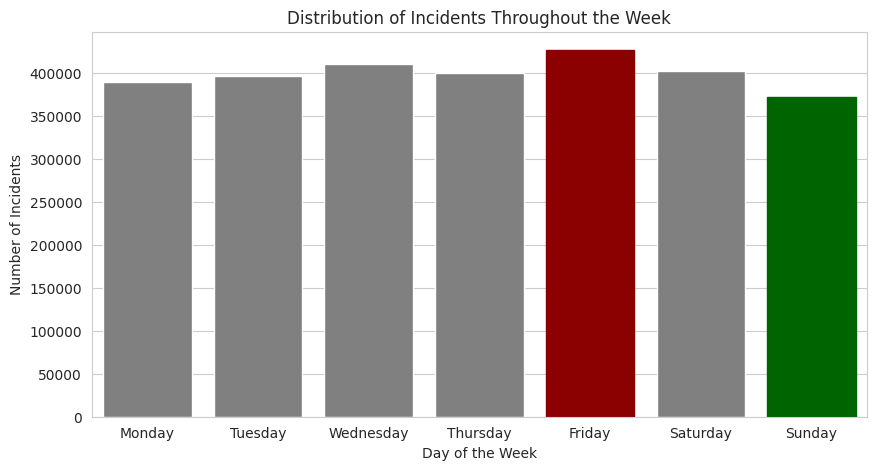

In [ ]:
def color_top_bottom_1_bars(ax):
    # Getting the heights of the bars
    heights = [p.get_height() for p in ax.patches]

    # Sorting bars and getting index of top 1 bar
    top_1_index = sorted(range(len(heights)), key=lambda i: heights[i], reverse=True)[0]
    ax.patches[top_1_index].set_color('#8B0000')  # Dark Red

    # Sorting bars and getting index of bottom 1 bar
    bottom_1_index = sorted(range(len(heights)), key=lambda i: heights[i])[0]
    ax.patches[bottom_1_index].set_color('#006400')  # Dark Green

plt.figure(figsize=(10, 5))

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = sns.countplot(data=sf_incident, x='Incident Day of Week', color='grey', order=order)
plt.title('Distribution of Incidents Throughout the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')

color_top_bottom_1_bars(ax)

plt.show()


In [ ]:
# Get counts for each day of the week
day_counts = sf_incident['Incident Day of Week'].value_counts()

# Extract the highest and lowest counts
highest_day = day_counts.idxmax()
highest_count = day_counts.max()

lowest_day = day_counts.idxmin()
lowest_count = day_counts.min()

print(f"The day with the highest number of incidents is {highest_day} with {highest_count} incidents.")
print(f"The day with the lowest number of incidents is {lowest_day} with {lowest_count} incidents.")


The day with the highest number of incidents is Friday with 426531 incidents.
The day with the lowest number of incidents is Sunday with 371766 incidents.


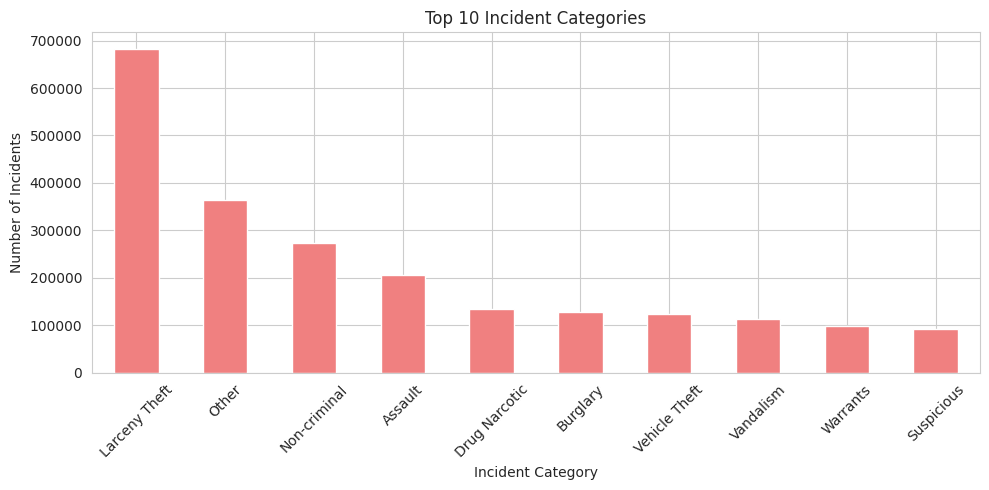

In [ ]:
# Distribution of incidents across different categories
plt.figure(figsize=(10, 5))
sf_incident['Incident Category'].value_counts().head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Incident Categories')
plt.xlabel('Incident Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


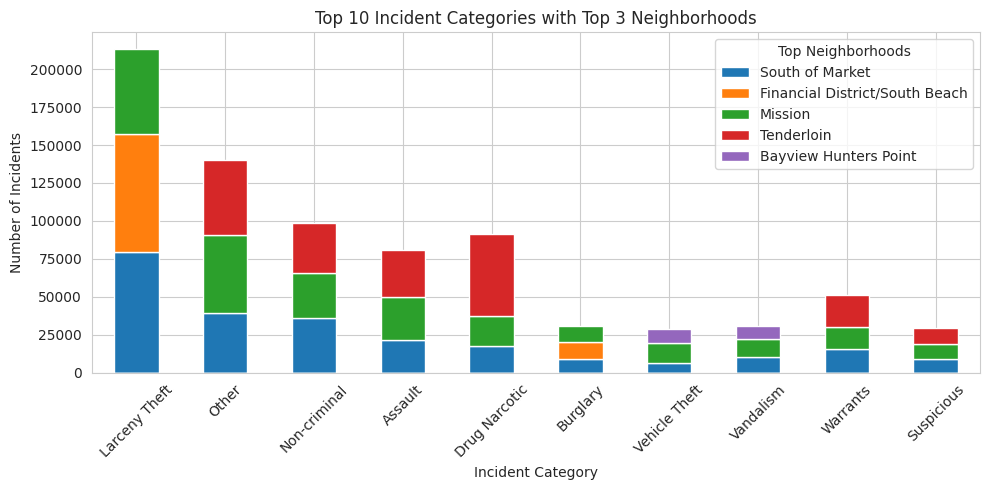

In [ ]:
# Getting the top 10 incident categories
top_categories = sf_incident['Incident Category'].value_counts().head(10).index

# DataFrame to hold counts for each neighborhood in the top categories
category_neighborhood_counts = pd.DataFrame()

for category in top_categories:
    # Get top 3 neighborhoods for the current category
    top_neighborhoods = sf_incident[sf_incident['Incident Category'] == category]['Neighborhood Name'].value_counts().head(3)

    # Create a temporary DataFrame to hold these counts
    temp_df = pd.DataFrame({category: top_neighborhoods})

    # Merge this into the main DataFrame
    category_neighborhood_counts = pd.concat([category_neighborhood_counts, temp_df], axis=1)

# Transpose the DataFrame for easier plotting
category_neighborhood_counts = category_neighborhood_counts.T

# Plotting
plt.figure(figsize=(10, 5))
category_neighborhood_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Top 10 Incident Categories with Top 3 Neighborhoods')
plt.xlabel('Incident Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Top Neighborhoods')
plt.tight_layout()
plt.show()

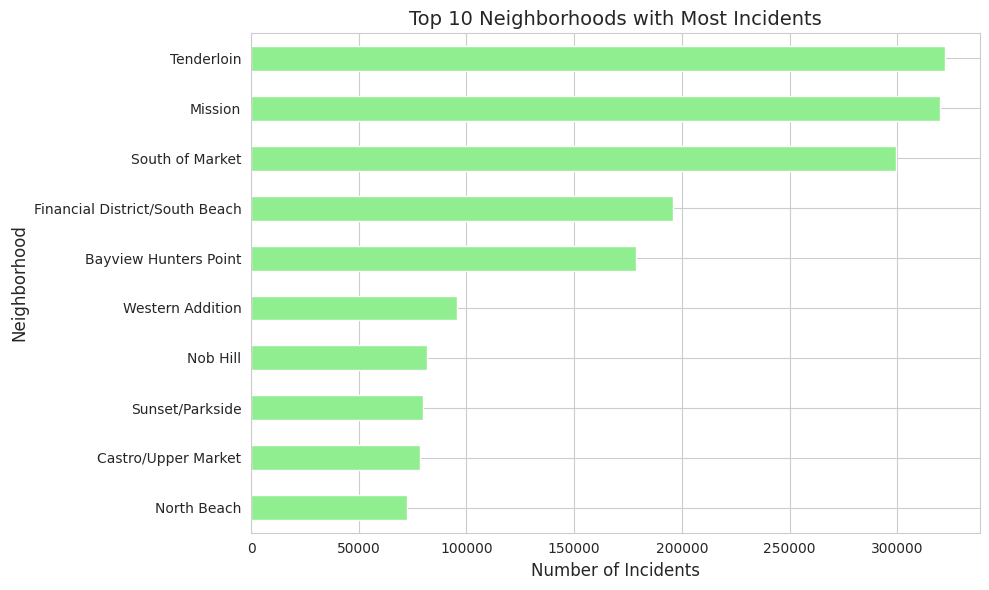

In [ ]:
plt.figure(figsize=(10, 6))
top_neighborhoods = sf_incident['Neighborhood Name'].value_counts().head(10)
top_neighborhoods.sort_values().plot(kind='barh', color='lightgreen')  # Using horizontal bars for better appearance
plt.title('Top 10 Neighborhoods with Most Incidents', fontsize=14)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

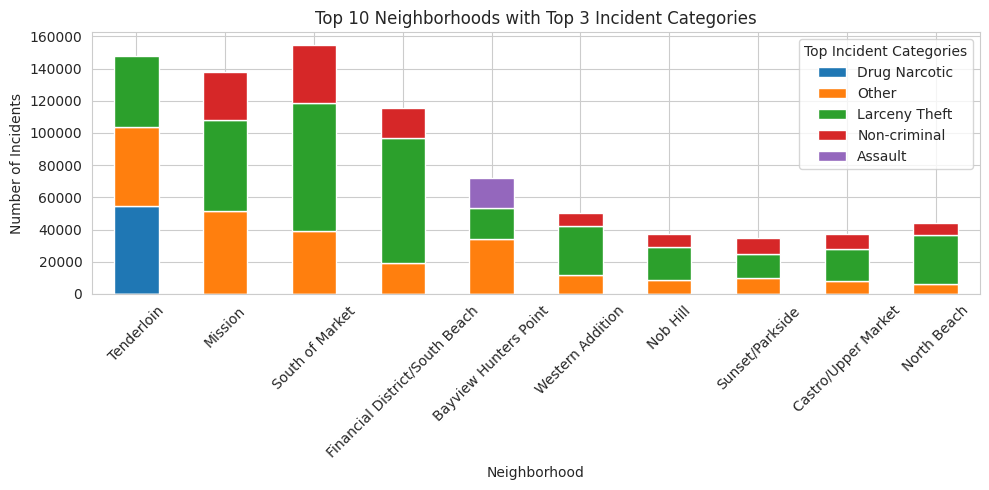

In [ ]:
# Getting the top 10 neighborhoods
top_neighborhoods = sf_incident['Neighborhood Name'].value_counts().head(10).index

# DataFrame to hold counts for each incident category in the top neighborhoods
neighborhood_category_counts = pd.DataFrame()

for neighborhood in top_neighborhoods:
    # Get top 3 incident categories for the current neighborhood
    top_categories = sf_incident[sf_incident['Neighborhood Name'] == neighborhood]['Incident Category'].value_counts().head(3)

    # Create a temporary DataFrame to hold these counts
    temp_df = pd.DataFrame({neighborhood: top_categories})

    # Merge this into the main DataFrame
    neighborhood_category_counts = pd.concat([neighborhood_category_counts, temp_df], axis=1)

# Transpose the DataFrame for easier plotting
neighborhood_category_counts = neighborhood_category_counts.T

# Plotting
plt.figure(figsize=(10, 5))
neighborhood_category_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Top 10 Neighborhoods with Top 3 Incident Categories')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Top Incident Categories')
plt.tight_layout()
plt.show()

In [ ]:
# Get counts for each incident category
incident_category_counts = sf_incident['Incident Category'].value_counts()

# Get counts for each neighborhood name
neighborhood_name_counts = sf_incident['Neighborhood Name'].value_counts()

# Print the results
print("Number of incidents by category:")
print(incident_category_counts)
print("\nNumber of incidents by neighborhood:")
print(neighborhood_name_counts)


Number of incidents by category:
Larceny Theft                                   683116
Other                                           364825
Non-criminal                                    273989
Assault                                         206093
Drug Narcotic                                   133477
Burglary                                        129096
Vehicle Theft                                   124744
Vandalism                                       113449
Warrants                                         98220
Suspicious                                       92185
Robbery                                          69296
Fraud                                            63790
Missing Person                                   58778
Malicious Mischief                               48172
Motor Vehicle Theft                              36581
Recovered Vehicle                                36390
Forgery Counterfeiting                           25290
Secondary Codes                 

In [ ]:
# Filter the DataFrame for 'Larceny Theft' incidents
larceny_theft_df = sf_incident[sf_incident['Incident Category'] == "Larceny Theft"]

# Count the number of incidents in each neighborhood
larceny_theft_counts_by_neighborhood = larceny_theft_df['Neighborhood Name'].value_counts()
larceny_theft_counts_by_neighborhood


South of Market                   79640
Financial District/South Beach    77907
Mission                           55962
Tenderloin                        44509
Western Addition                  30093
North Beach                       29975
Marina                            23721
Hayes Valley                      22214
Nob Hill                          21047
Castro/Upper Market               19885
Russian Hill                      19871
Bayview Hunters Point             19104
Pacific Heights                   16800
Sunset/Parkside                   15278
Outer Richmond                    14212
West of Twin Peaks                13697
Potrero Hill                      13105
Lakeshore                         11552
Chinatown                         10775
Haight Ashbury                    10424
Golden Gate Park                  10239
Bernal Heights                     9655
Lone Mountain/USF                  9431
Inner Sunset                       8958
Mission Bay                        8744


In [ ]:
# Filter the DataFrame for 'Larceny Theft' incidents
assault_df = sf_incident[sf_incident['Incident Category'] == "Assault"]

# Count the number of incidents in each neighborhood
assault_counts_by_neighborhood = assault_df['Neighborhood Name'].value_counts()
assault_counts_by_neighborhood


Tenderloin                        30811
Mission                           28105
South of Market                   21914
Bayview Hunters Point             18278
Financial District/South Beach    11474
Western Addition                   6927
Castro/Upper Market                6098
Nob Hill                           5529
Sunset/Parkside                    5097
Bernal Heights                     4966
North Beach                        4868
Excelsior                          4611
Visitacion Valley                  4359
Hayes Valley                       4200
Chinatown                          3685
Outer Mission                      3587
Potrero Hill                       3333
Oceanview/Merced/Ingleside         3222
Outer Richmond                     3190
West of Twin Peaks                 3115
Marina                             3052
Haight Ashbury                     2816
Portola                            2621
Russian Hill                       2137
Inner Richmond                     1997


In [ ]:
# Filter the DataFrame for 'Larceny Theft' incidents
drug_df = sf_incident[sf_incident['Incident Category'] == "Drug Narcotic"]

# Count the number of incidents in each neighborhood
drug_counts_by_neighborhood = drug_df['Neighborhood Name'].value_counts()
drug_counts_by_neighborhood


Tenderloin                        54461
Mission                           19335
South of Market                   17829
Bayview Hunters Point              8171
Haight Ashbury                     3144
Nob Hill                           2507
Castro/Upper Market                2439
Western Addition                   2434
Financial District/South Beach     2172
Golden Gate Park                   2067
Hayes Valley                       1815
Bernal Heights                     1520
Excelsior                          1319
Oceanview/Merced/Ingleside         1279
Sunset/Parkside                    1194
Potrero Hill                       1140
Outer Mission                      1092
Visitacion Valley                   843
West of Twin Peaks                  780
North Beach                         753
Marina                              699
Outer Richmond                      650
Portola                             569
Pacific Heights                     514
Chinatown                           508


<ipython-input-74-4bee6b5fc7d2>:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_resampled = sf_incident.resample('M', on='Incident Date').mean()


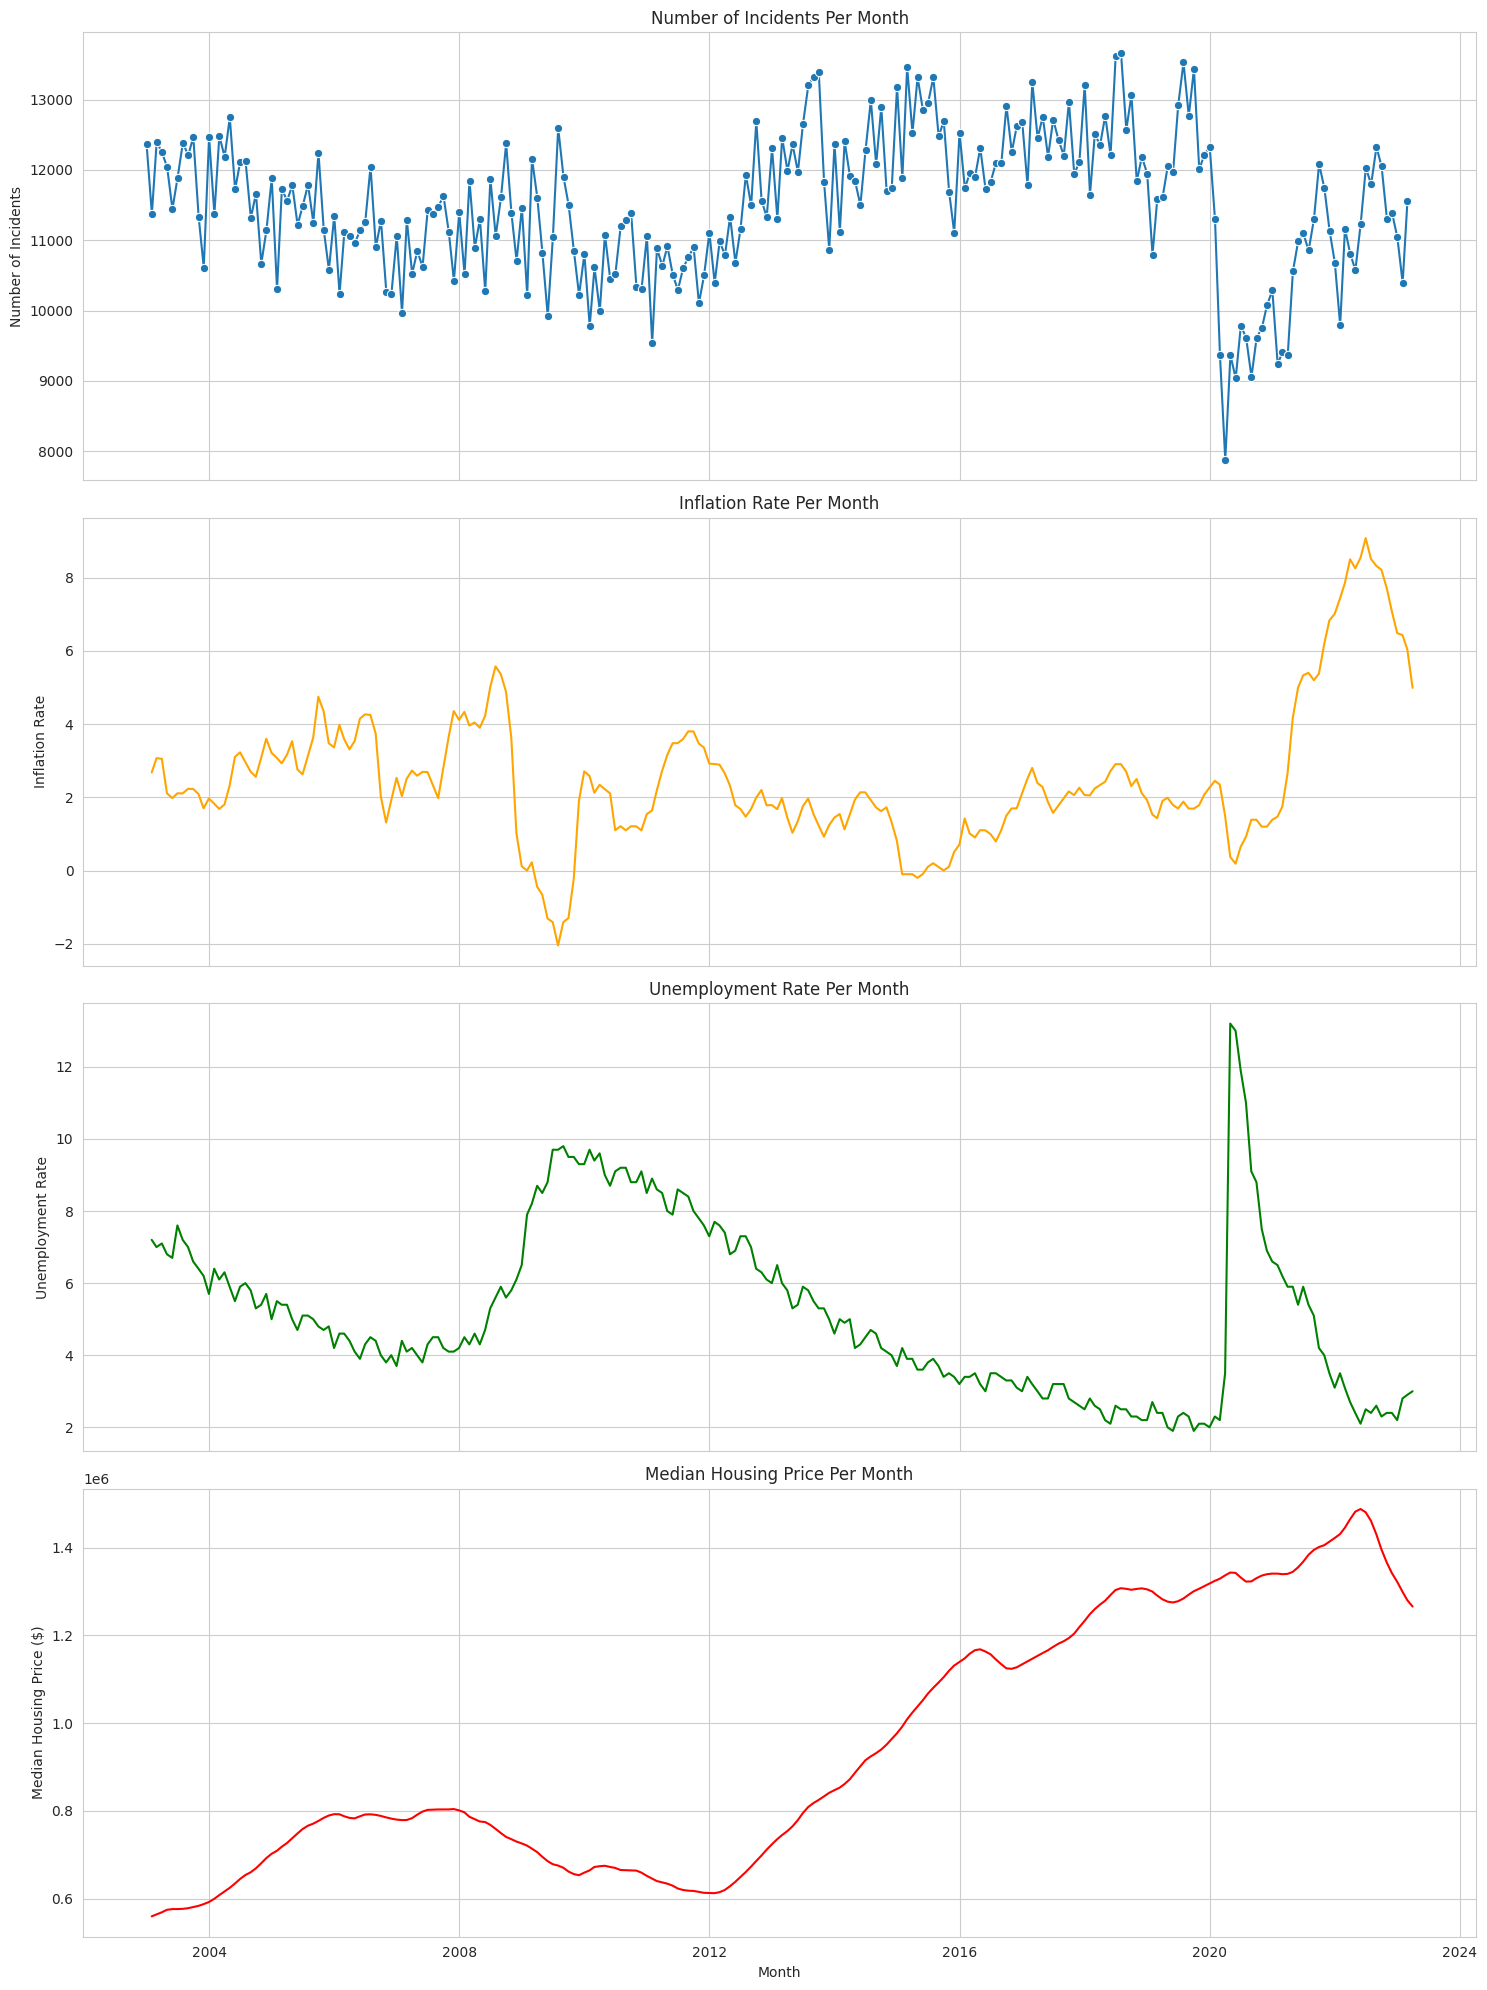

In [ ]:
# Adding a 'YearMonth' column for easier aggregation
sf_incident['YearMonth'] = sf_incident['Incident Date'].dt.to_period('M')

# Grouping the data by month
monthly_data = sf_incident.groupby('YearMonth').agg({
    'Incident Code': 'count',
    'Inflation Rate': 'mean',
    'Unemployment Rate': 'mean',
    'Median Housing Price': 'mean'
}).reset_index()

# Converting 'YearMonth' back to datetime format for plotting
monthly_data['YearMonth'] = monthly_data['YearMonth'].dt.to_timestamp()

# Renaming columns for clarity
monthly_data = monthly_data.rename(columns={'Incident Code': 'Number of Incidents'}) # counting the total number of incident codes as the number of incidents

# Sorting the data by 'YearMonth' to ensure the plot is in chronological order
monthly_data_sorted = monthly_data.sort_values(by='YearMonth')

# Converting 'YearMonth' back to datetime for plotting
monthly_data_sorted['YearMonth'] = pd.to_datetime(monthly_data_sorted['YearMonth'].astype(str))

# Resampling the data to monthly frequency
monthly_resampled = sf_incident.resample('M', on='Incident Date').mean()

# Resetting index to get 'Incident Date' back as a column
monthly_resampled.reset_index(inplace=True)

# Creating the plots with the resampled data

fig, axs = plt.subplots(4, 1, figsize=(15, 20), sharex=True)

# Plot for Number of Incidents
sns.lineplot(x='YearMonth', y='Number of Incidents', data=monthly_data_sorted, marker="o", ax=axs[0])
axs[0].set_title('Number of Incidents Per Month')
axs[3].set_xlabel('Month')
axs[0].set_ylabel('Number of Incidents')

# Plot for Inflation Rate
sns.lineplot(x='Incident Date', y='Inflation Rate', data=monthly_resampled, color='orange', ax=axs[1])
axs[1].set_title('Inflation Rate Per Month')
axs[3].set_xlabel('Month')
axs[1].set_ylabel('Inflation Rate')

# Plot for Unemployment Rate
sns.lineplot(x='Incident Date', y='Unemployment Rate', data=monthly_resampled, color='green', ax=axs[2])
axs[2].set_title('Unemployment Rate Per Month')
axs[3].set_xlabel('Month')
axs[2].set_ylabel('Unemployment Rate')

# Plot for Median Housing Price
sns.lineplot(x='Incident Date', y='Median Housing Price', data=monthly_resampled, color='red', ax=axs[3])
axs[3].set_title('Median Housing Price Per Month')
axs[3].set_xlabel('Month')
axs[3].set_ylabel('Median Housing Price ($)')


plt.tight_layout()
plt.show()

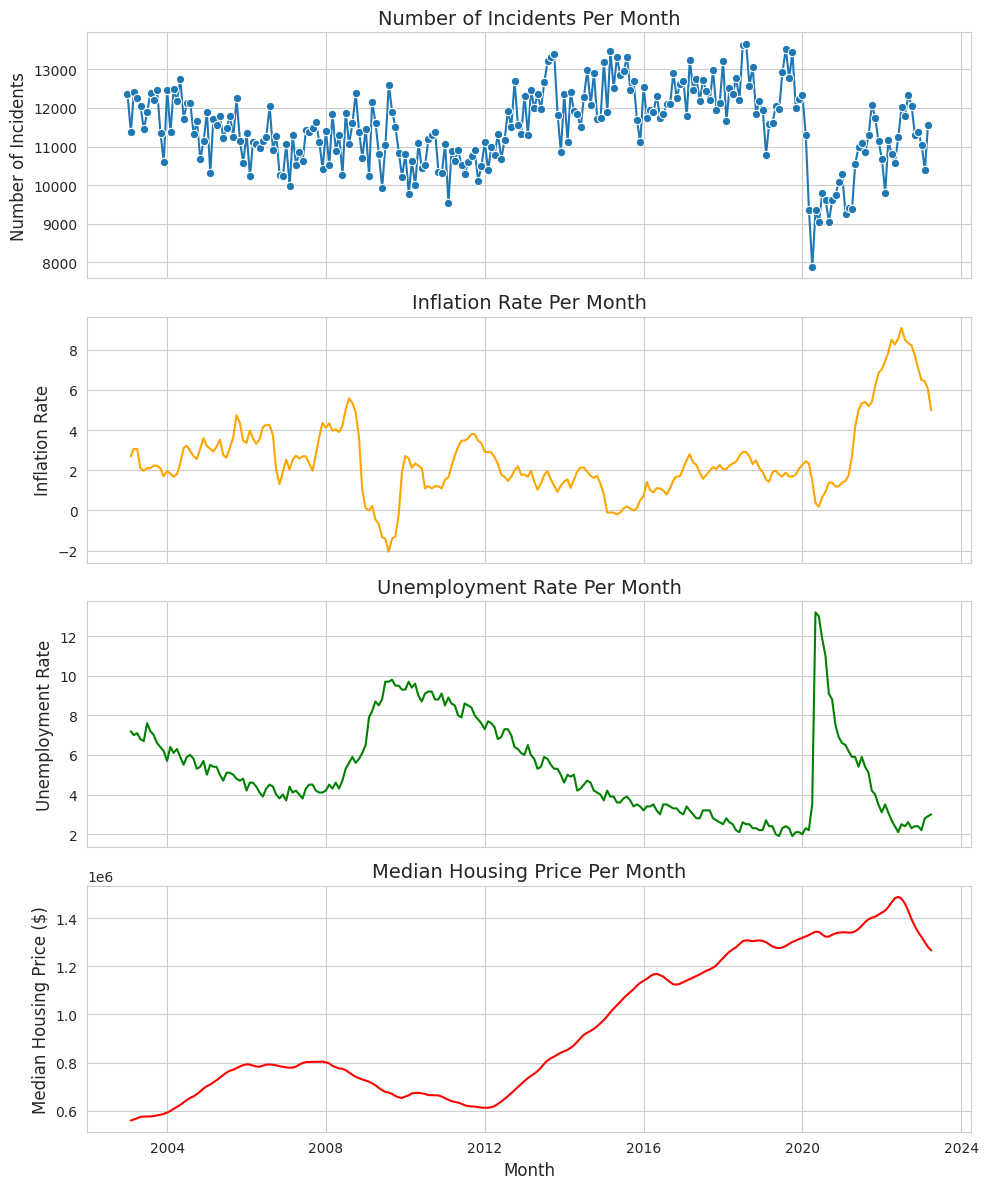

In [ ]:
# differen appearance of the same plots (for paper)

fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot for Number of Incidents
sns.lineplot(x='YearMonth', y='Number of Incidents', data=monthly_data_sorted, marker="o", ax=axs[0])
axs[0].set_title('Number of Incidents Per Month', fontsize=14)
axs[0].set_ylabel('Number of Incidents', fontsize=12)
axs[0].tick_params(labelsize=10)

# Plot for Inflation Rate
sns.lineplot(x='Incident Date', y='Inflation Rate', data=monthly_resampled, color='orange', ax=axs[1])
axs[1].set_title('Inflation Rate Per Month', fontsize=14)
axs[1].set_ylabel('Inflation Rate', fontsize=12)
axs[1].tick_params(labelsize=10)

# Plot for Unemployment Rate
sns.lineplot(x='Incident Date', y='Unemployment Rate', data=monthly_resampled, color='green', ax=axs[2])
axs[2].set_title('Unemployment Rate Per Month', fontsize=14)
axs[2].set_ylabel('Unemployment Rate', fontsize=12)
axs[2].tick_params(labelsize=10)

# Plot for Median Housing Price
sns.lineplot(x='Incident Date', y='Median Housing Price', data=monthly_resampled, color='red', ax=axs[3])
axs[3].set_title('Median Housing Price Per Month', fontsize=14)
axs[3].set_xlabel('Month', fontsize=12)
axs[3].set_ylabel('Median Housing Price ($)', fontsize=12)
axs[3].tick_params(labelsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# Adding a 'YearMonth' column for easier aggregation
sf_incident['YearMonth'] = sf_incident['Incident Date'].dt.to_period('M')

# Grouping the data by month
monthly_data = sf_incident.groupby('YearMonth').agg({
    'Incident Code': 'count',
    'Inflation Rate': 'mean',
    'Unemployment Rate': 'mean',
    'Median Housing Price': 'mean'
}).reset_index()

# Converting 'YearMonth' back to datetime format for plotting
monthly_data['YearMonth'] = monthly_data['YearMonth'].dt.to_timestamp()

# Renaming columns for clarity
monthly_data = monthly_data.rename(columns={'Incident Code': 'Number of Incidents'}) # counting the total number of incident codes as the number of incidents

# Sorting the data by 'YearMonth' to ensure the plot is in chronological order
monthly_data_sorted = monthly_data.sort_values(by='YearMonth')

# Converting 'YearMonth' back to datetime for plotting
monthly_data_sorted['YearMonth'] = pd.to_datetime(monthly_data_sorted['YearMonth'].astype(str))

# Resampling the data to monthly frequency
monthly_resampled = sf_incident.resample('M', on='Incident Date').mean()

# Resetting index to get 'Incident Date' back as a column
monthly_resampled.reset_index(inplace=True)


<ipython-input-76-48fa43f6dc60>:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_resampled = sf_incident.resample('M', on='Incident Date').mean()


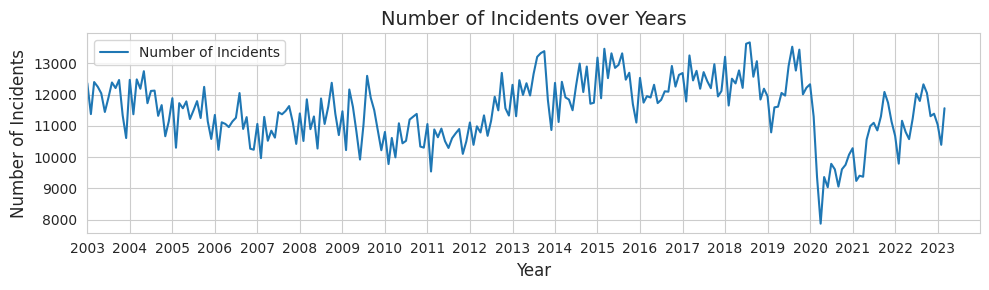

In [ ]:
plt.figure(figsize=(10, 3))

sns.lineplot(x='YearMonth', y='Number of Incidents', data=monthly_data_sorted, label='Number of Incidents')
plt.title('Number of Incidents over Years', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.tick_params(labelsize=10)

# Adjust x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())  # Yearly ticks
ax.xaxis.set_major_formatter(DateFormatter("%Y"))  # Display only the year
ax.set_xlim(pd.Timestamp('2003-01-01'), pd.Timestamp('2023-12-31'))  # Exclude 2002 and 2024

plt.tight_layout()
plt.show()


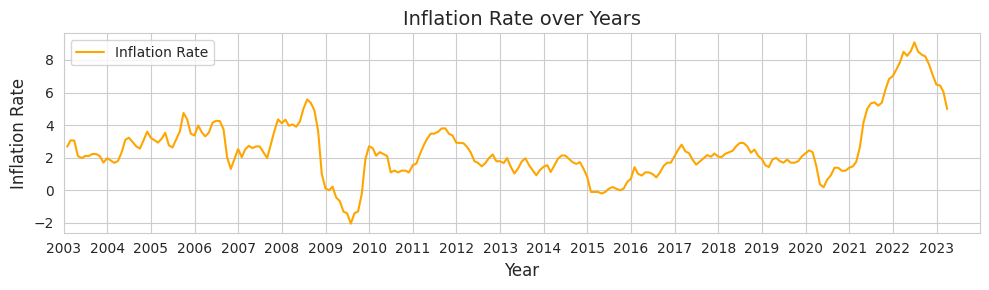

In [ ]:
plt.figure(figsize=(10, 3))

sns.lineplot(x='Incident Date', y='Inflation Rate', data=monthly_resampled, color='orange', label='Inflation Rate')
plt.title('Inflation Rate over Years', fontsize=14)
plt.ylabel('Inflation Rate', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.tick_params(labelsize=10)

# Adjust x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())  # Yearly ticks
ax.xaxis.set_major_formatter(DateFormatter("%Y"))  # Display only the year
ax.set_xlim(pd.Timestamp('2003-01-01'), pd.Timestamp('2023-12-31'))  # Exclude 2002 and 2024

plt.tight_layout()
plt.show()


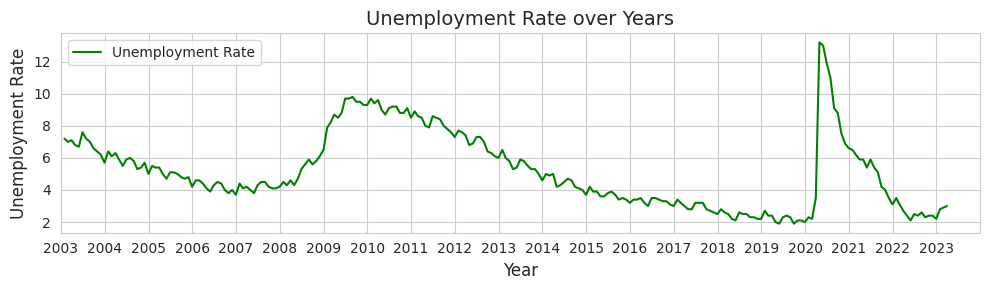

In [ ]:
plt.figure(figsize=(10, 3))

sns.lineplot(x='Incident Date', y='Unemployment Rate', data=monthly_resampled, color='green', label='Unemployment Rate')
plt.title('Unemployment Rate over Years', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.tick_params(labelsize=10)

# Adjust x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())  # Yearly ticks
ax.xaxis.set_major_formatter(DateFormatter("%Y"))  # Display only the year
ax.set_xlim(pd.Timestamp('2003-01-01'), pd.Timestamp('2023-12-31'))  # Exclude 2002 and 2024

plt.tight_layout()
plt.show()


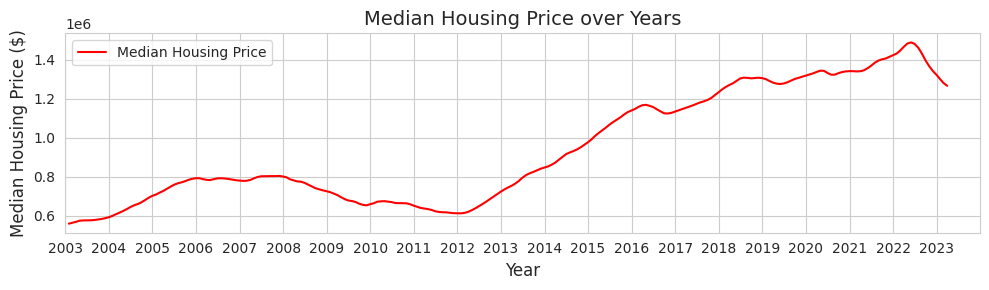

In [ ]:
plt.figure(figsize=(10, 3))

sns.lineplot(x='Incident Date', y='Median Housing Price', data=monthly_resampled, color='red', label='Median Housing Price')
plt.title('Median Housing Price over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Housing Price ($)', fontsize=12)
plt.tick_params(labelsize=10)

# Adjust x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())  # Yearly ticks
ax.xaxis.set_major_formatter(DateFormatter("%Y"))  # Display only the year
ax.set_xlim(pd.Timestamp('2003-01-01'), pd.Timestamp('2023-12-31'))  # Exclude 2002 and 2024

plt.tight_layout()
plt.show()


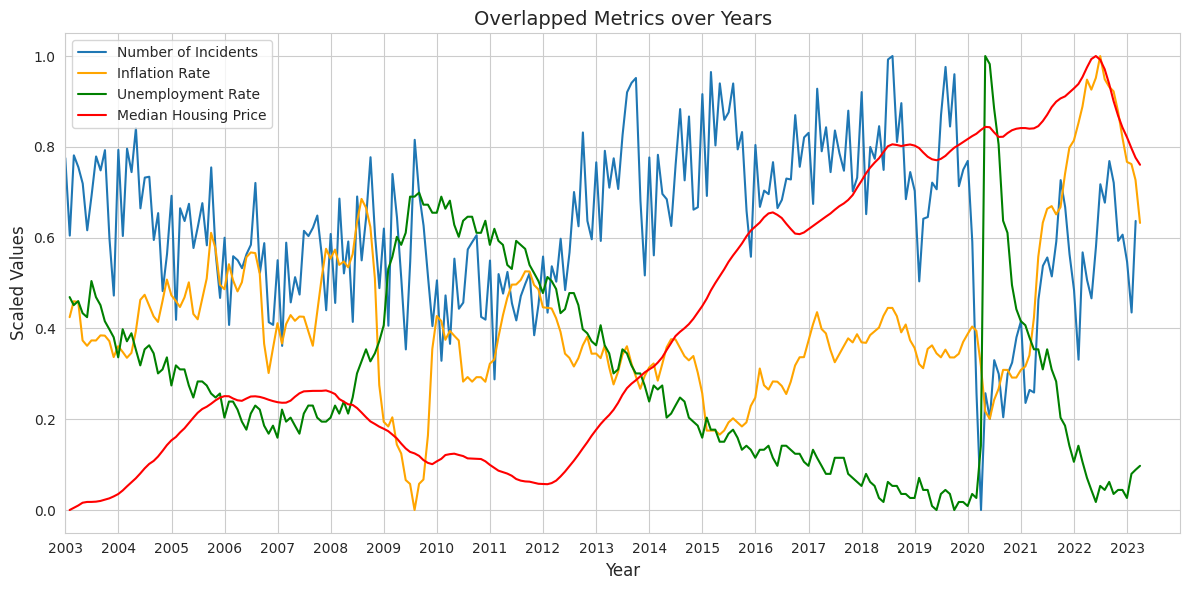

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMax scaler to put all the features y-values on one plot
scaler = MinMaxScaler()

# Scale the columns
monthly_data_sorted['Number of Incidents Scaled'] = scaler.fit_transform(monthly_data_sorted[['Number of Incidents']])
monthly_resampled['Inflation Rate Scaled'] = scaler.fit_transform(monthly_resampled[['Inflation Rate']])
monthly_resampled['Unemployment Rate Scaled'] = scaler.fit_transform(monthly_resampled[['Unemployment Rate']])
monthly_resampled['Median Housing Price Scaled'] = scaler.fit_transform(monthly_resampled[['Median Housing Price']])

plt.figure(figsize=(12, 6))

# Plot each metric
sns.lineplot(x='YearMonth', y='Number of Incidents Scaled', data=monthly_data_sorted, label='Number of Incidents')
sns.lineplot(x='Incident Date', y='Inflation Rate Scaled', data=monthly_resampled, color='orange', label='Inflation Rate')
sns.lineplot(x='Incident Date', y='Unemployment Rate Scaled', data=monthly_resampled, color='green', label='Unemployment Rate')
sns.lineplot(x='Incident Date', y='Median Housing Price Scaled', data=monthly_resampled, color='red', label='Median Housing Price')

# Adding title and labels
plt.title('Overlapped Metrics over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Scaled Values', fontsize=12)
plt.tick_params(labelsize=10)
plt.legend()

# Adjusting the x-axis to display only years with 1-year step and exclude 2002 and 2024
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())  # Setting major ticks to yearly
ax.xaxis.set_major_formatter(DateFormatter("%Y"))  # Displaying only the year

# Set x-axis limits
start_date = pd.Timestamp('2003-01-01')
end_date = pd.Timestamp('2023-12-31')

ax.set_xlim(start_date, end_date)

plt.tight_layout()
plt.show()


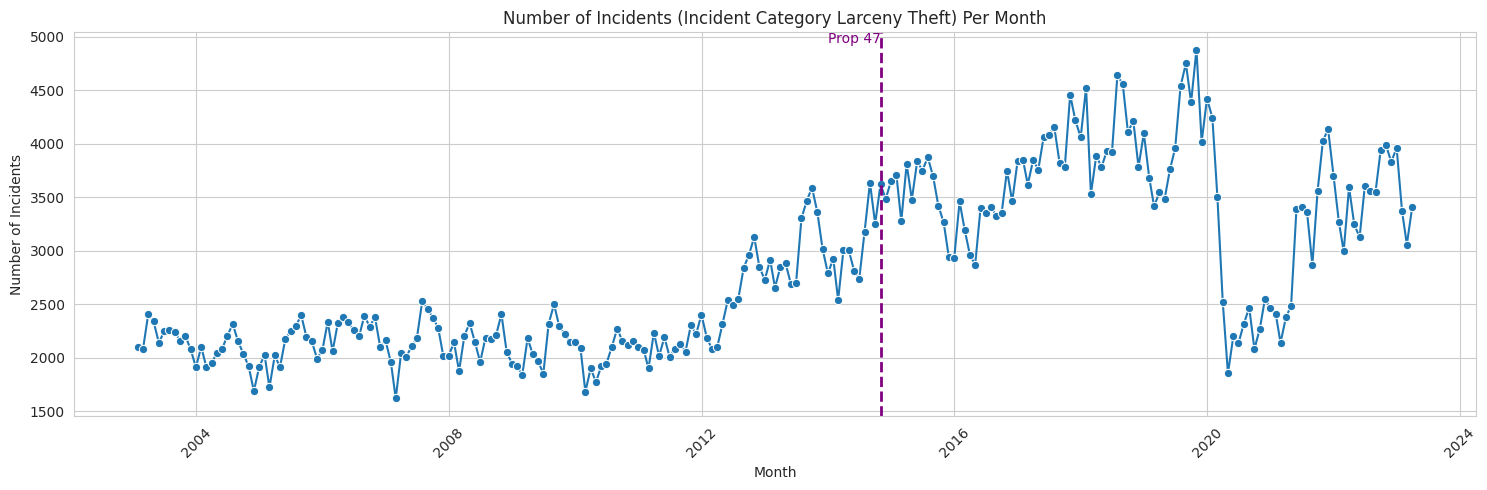

In [ ]:
# Prop 47, plotting larceny theft over time

plt.figure(figsize=(15, 5))

# Filtering the data to include only incidents with Incident Category equal to Larceny Theft
incidents_larceny = sf_incident[sf_incident['Incident Category'] == "Larceny Theft"]

# Grouping the filtered data by month to get the number of incidents with category "Larceny Theft" per month
incidents_larceny_monthly = incidents_larceny.resample('M', on='Incident Date').size()

# Resetting index to get 'Incident Date' back as a column
incidents_larceny_monthly = incidents_larceny_monthly.reset_index(name='Number of Incidents')


# Plot for Number of Incidents (Incident Code 6374)
ax = sns.lineplot(x='Incident Date', y='Number of Incidents', data=incidents_larceny_monthly, marker="o")
ax.axvline(pd.to_datetime('2014-11-01'), color='purple', linestyle='--', lw=2)
ax.text(pd.to_datetime('2014-11-01'), ax.get_ylim()[1], 'Prop 47', color='purple', ha='right', va='top')
ax.set_title('Number of Incidents (Incident Category Larceny Theft) Per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Incidents')


# Adjusting the layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# function to make the first character of each word upper case, and the others lower case

def transform_case(s):
  return ' '.join(word[0].upper() + word[1:].lower() for word in s.split())

sf_incident['Incident Description'] = sf_incident['Incident Description'].apply(transform_case)

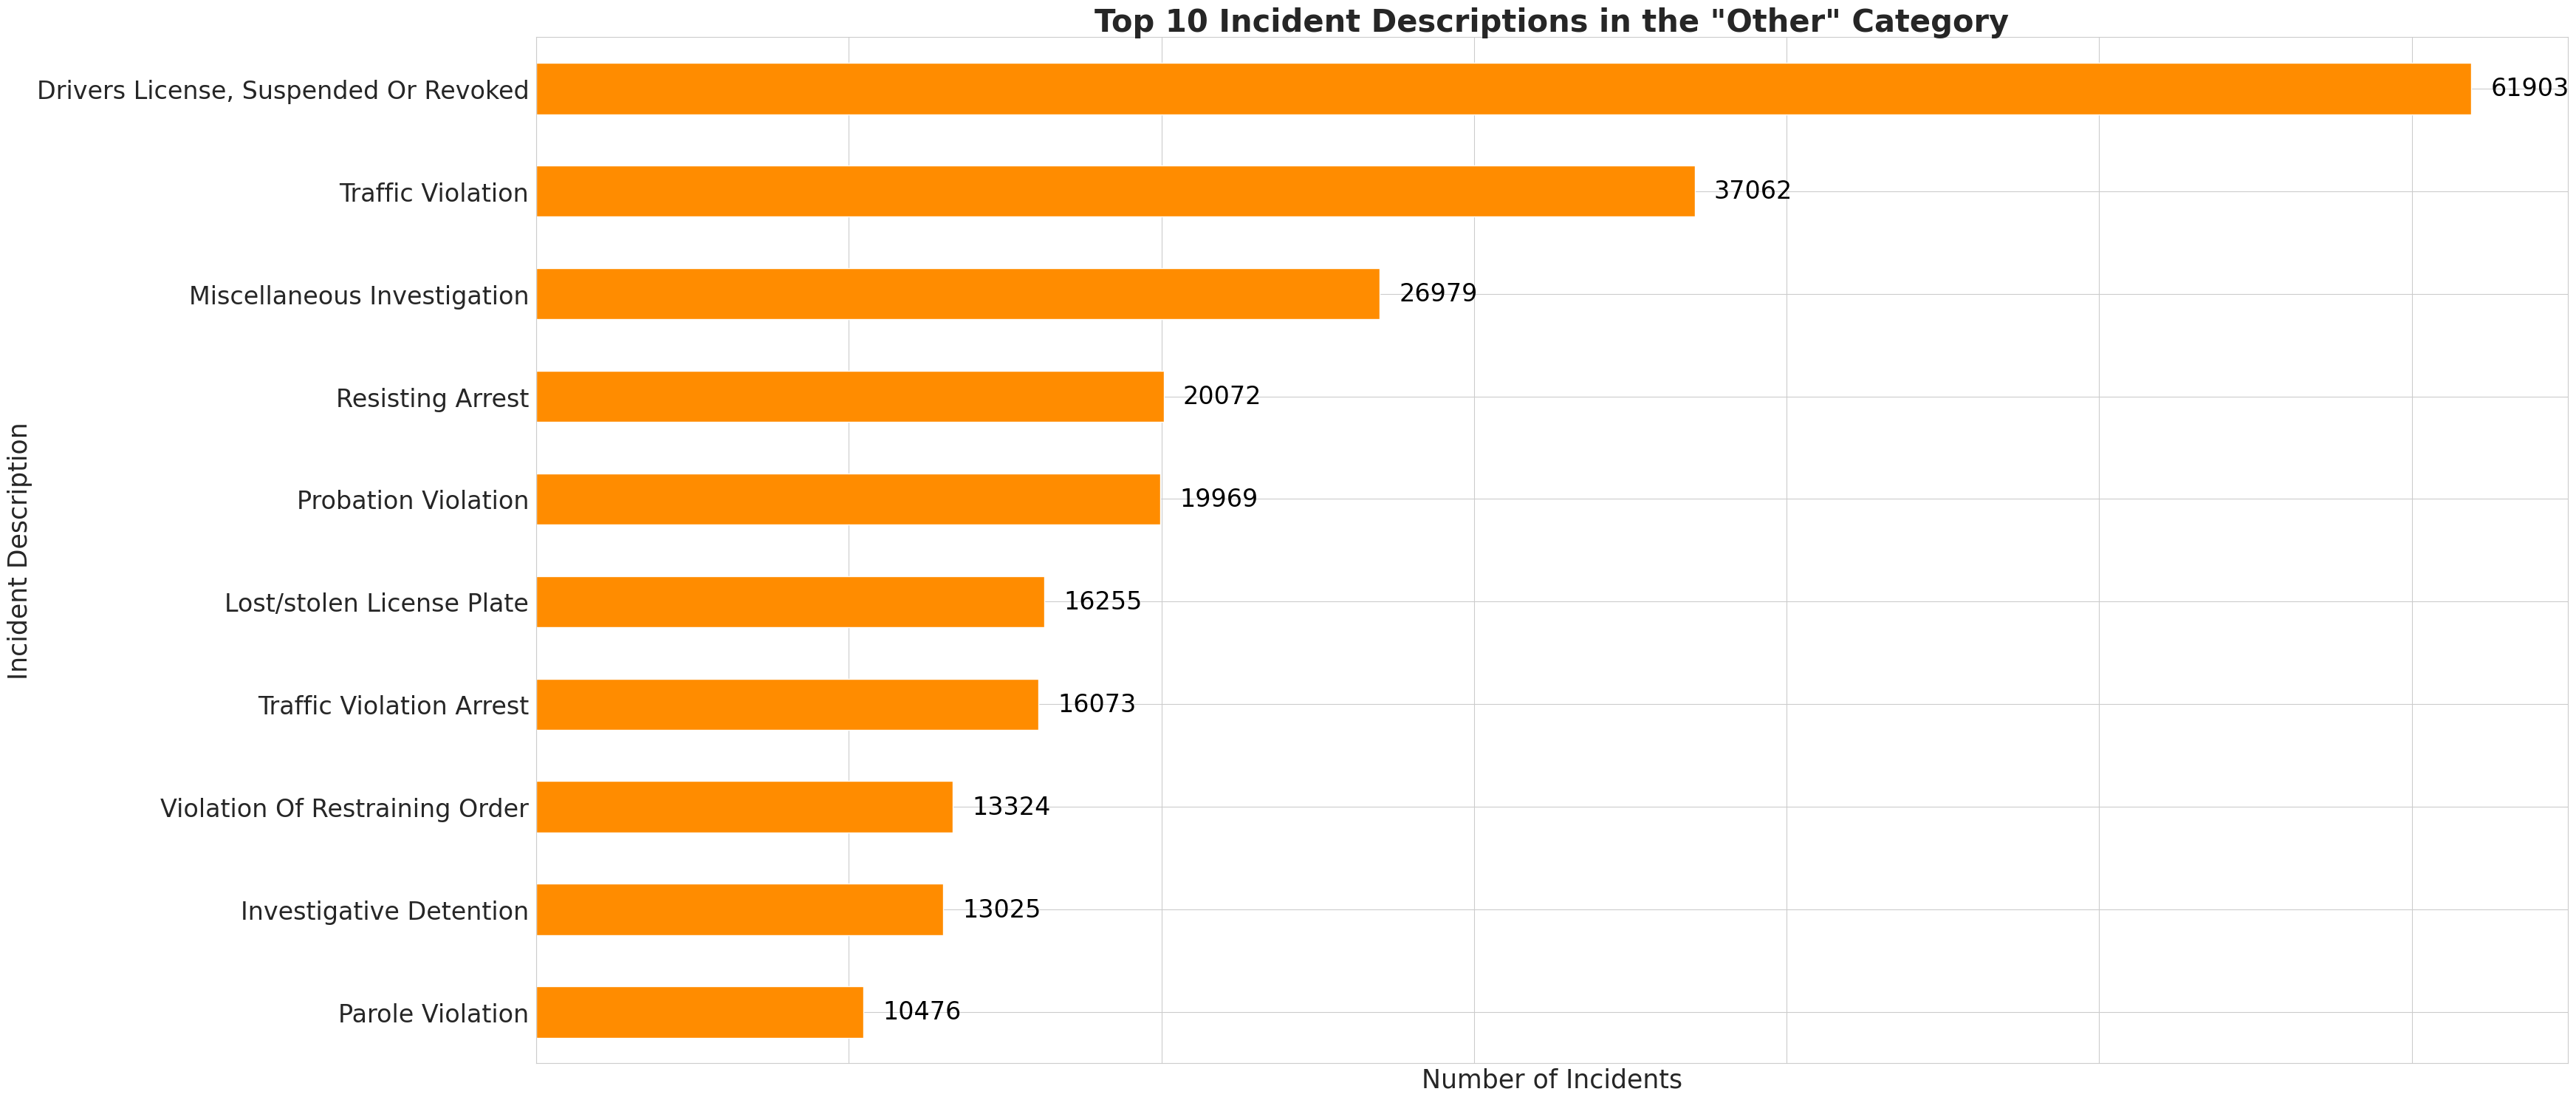

In [ ]:
plt.figure(figsize=(35, 15))

# Calculating the value counts and getting the top 10
incident_counts = sf_incident[sf_incident['Incident Category'] == 'Other']['Incident Description'].value_counts().head(10).sort_values(ascending=True)
bar_plot = incident_counts.plot(kind='barh', color='darkorange')

# Setting the title and labels with increased font size and regular text
plt.title('Top 10 Incident Descriptions in the "Other" Category', weight='bold', fontsize=30)
plt.xlabel('Number of Incidents', fontsize=25)
plt.ylabel('Incident Description', fontsize=25)
plt.yticks(fontsize=20)

# Setting all text properties for axes to not bold
for label in (bar_plot.get_xticklabels() + bar_plot.get_yticklabels()):
    label.set_fontsize(24)
    label.set_weight('normal')

# Removing x-axis marks
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Adding text labels after each bar for the count
for bar in bar_plot.patches:
    bar_width = bar.get_width()
    label_x_pos = bar_width + max(incident_counts) * 0.01  # Position the label slightly after the end of the bar
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{int(bar_width)}', va='center', fontsize=24, color='black')

plt.tight_layout()
plt.show()

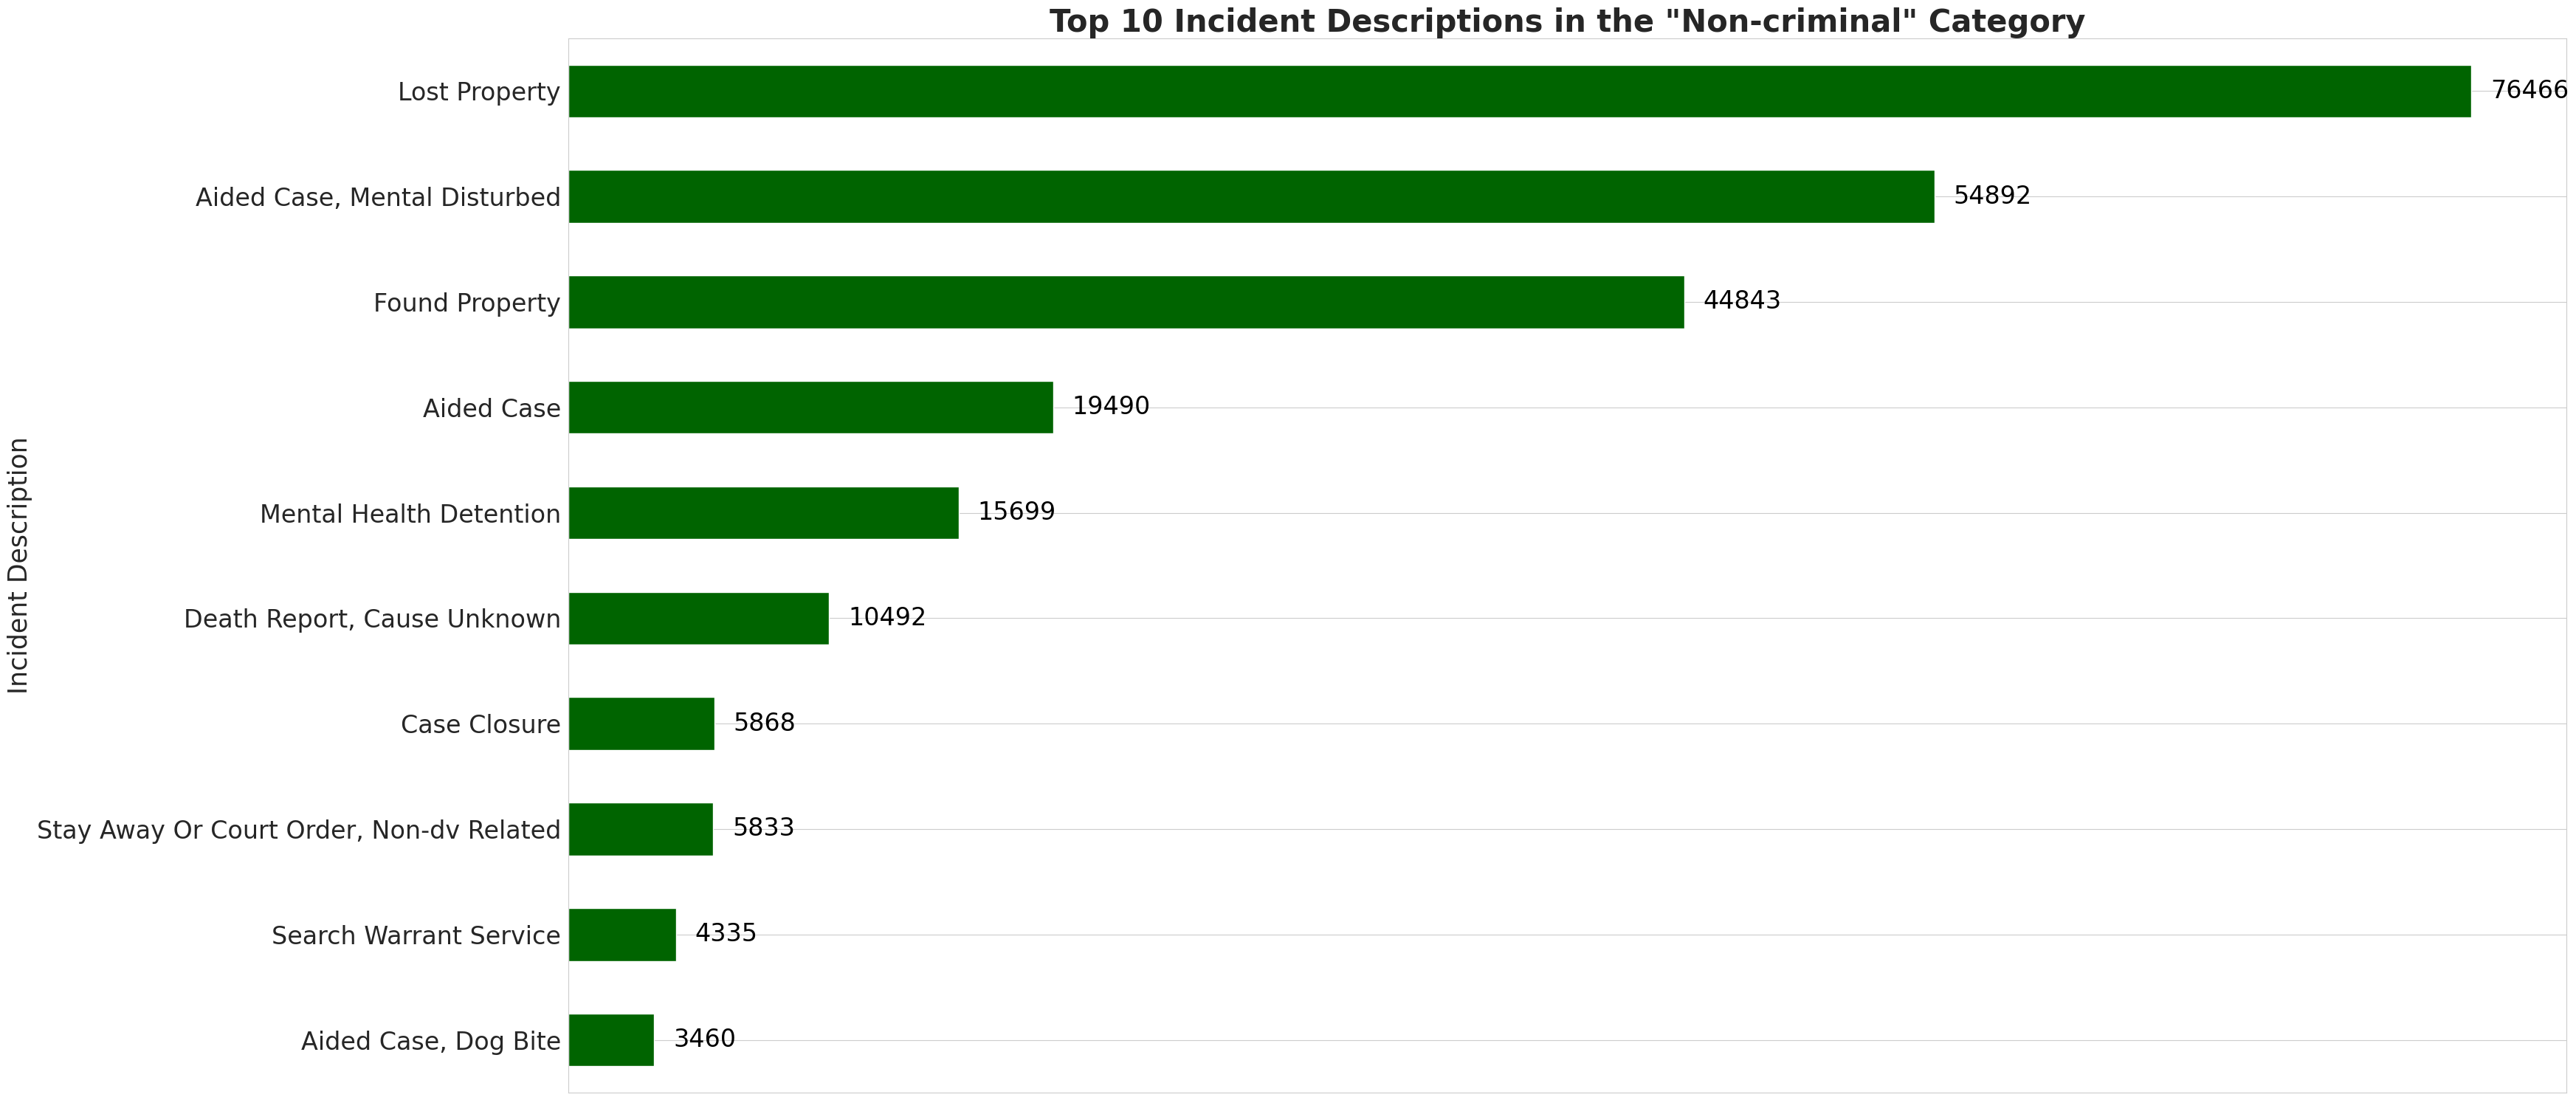

In [ ]:
plt.figure(figsize=(35, 15))

# Calculating the value counts and getting the top 10 for 'Non-criminal' category
non_criminal_counts = sf_incident[sf_incident['Incident Category'] == 'Non-criminal']['Incident Description'].value_counts().head(10).sort_values(ascending=True)
bar_plot_nc = non_criminal_counts.plot(kind='barh', color='darkgreen')

# Setting the title and labels with increased font size and regular text
plt.title('Top 10 Incident Descriptions in the "Non-criminal" Category', weight='bold', fontsize=30)
plt.ylabel('Incident Description', fontsize=25)
plt.xlabel('Number of Incidents', fontsize=25)

# Set all text properties for axes to not bold
for label in (bar_plot_nc.get_xticklabels() + bar_plot_nc.get_yticklabels()):
    label.set_fontsize(24)
    label.set_weight('normal')

# Removing the x-axis line and ticks
bar_plot_nc.xaxis.set_visible(False)  # This hides the x-axis

# Adding text labels after each bar for the count, with bold font style
for bar in bar_plot_nc.patches:
    bar_width = bar.get_width()
    label_x_pos = bar_width + max(non_criminal_counts) * 0.01  # Position the label slightly after the end of the bar
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{int(bar_width)}', va='center', fontsize=24, color='black')

plt.tight_layout()
plt.show()

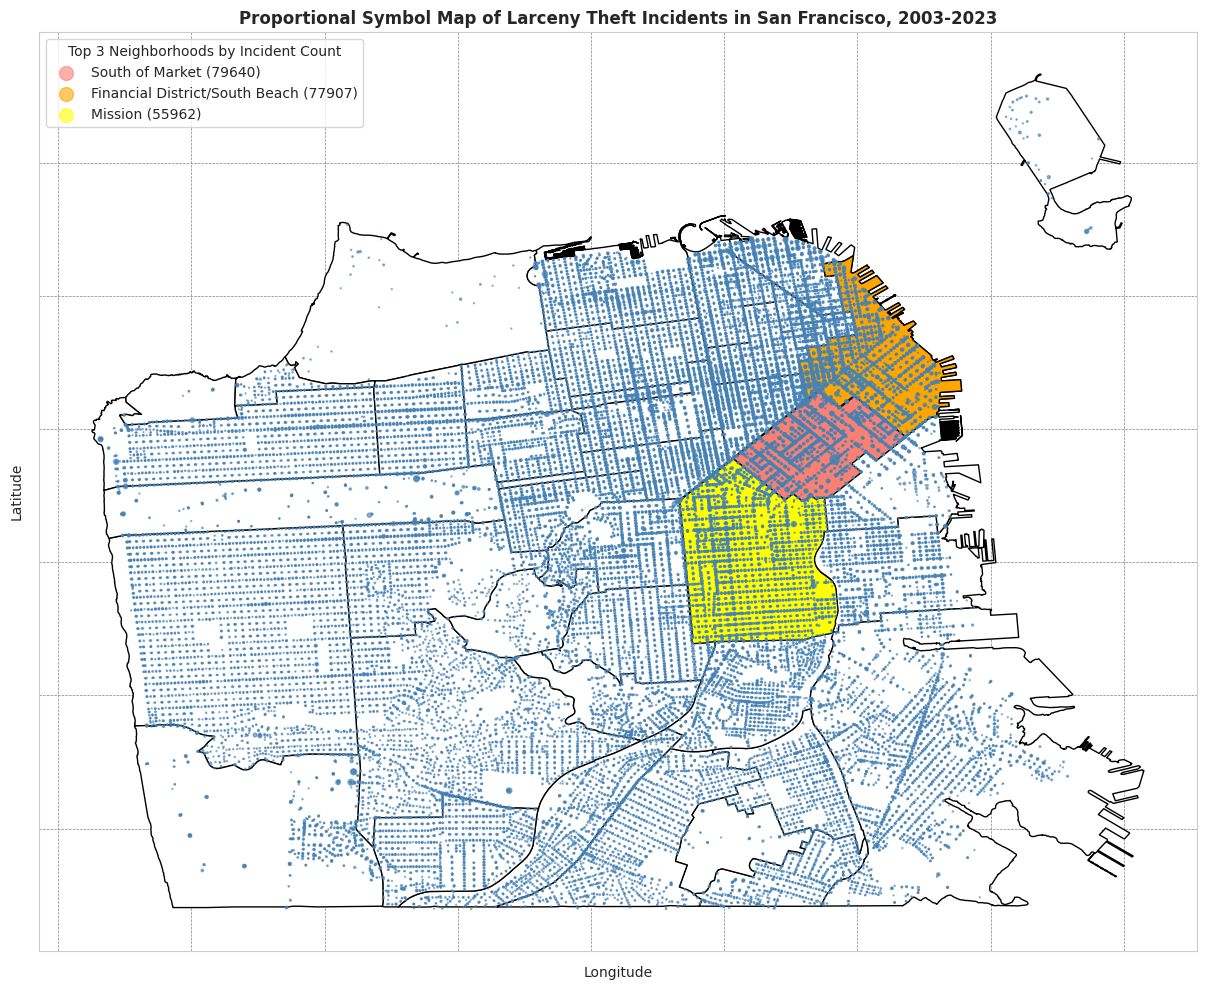

In [ ]:
# proportional Symbol Map of Larceny Theft incidents , all years

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely import wkt

sf_incident_larceny = sf_incident[sf_incident['Incident Category'] == "Larceny Theft"]
neighborhood_data = pd.read_csv("/content/drive/MyDrive/DATA240/project/San_Francisco_Analysis_Neighborhoods.csv") # contains the GPS bounding boxes of each neighborhood

# Converting the larceny incident data to a GeoDataFrame based on latitude and longitude
gdf = gpd.GeoDataFrame(
    sf_incident_larceny,
    geometry=gpd.points_from_xy(sf_incident_larceny.Longitude, sf_incident_larceny.Latitude)
)

# Converting the neighborhood data containing the bounding boxes of each neighborhood to a GeoDataFrame
neighborhood_gdf = gpd.GeoDataFrame(
    neighborhood_data,
    geometry=neighborhood_data['the_geom'].apply(wkt.loads)
)
neighborhood_gdf.crs = "EPSG:4326"

# Aggregating the incidents by location
location_incidents = gdf.groupby(['Latitude', 'Longitude']).size().reset_index(name='counts')
location_gdf = gpd.GeoDataFrame(location_incidents, geometry=gpd.points_from_xy(location_incidents.Longitude, location_incidents.Latitude))

# Counting the number of incidents in each neighborhood using the 'Neighborhood Name' column
neighborhood_incident_counts = sf_incident_larceny['Neighborhood Name'].value_counts().rename_axis('nhood').reset_index(name='incident_count')

# Merging the incident counts with the neighborhood GeoDataFrame
neighborhood_gdf = neighborhood_gdf.merge(neighborhood_incident_counts, on='nhood', how='left')

# Defining colors to use for the top 3 neighborhoods
top_colors = ['salmon', 'orange', 'yellow']

# Sorting the neighborhoods by incident count and getting the top 3, along with their respective colors
top_neighborhoods = neighborhood_gdf.sort_values(by='incident_count', ascending=False).head(3)
top_neighborhoods['color'] = top_colors[:len(top_neighborhoods)]

# Defining the size for the scatter points based on the incident counts
size = 50 * (location_gdf['counts'] / location_gdf['counts'].max()) ** 0.5

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plotting the neighborhoods with a white color
neighborhood_gdf.plot(ax=ax, color='white', edgecolor='black')

# Highlighting the top 3 neighborhoods with a different color
for color, row in zip(top_colors, top_neighborhoods.itertuples()):
    neighborhood_gdf[neighborhood_gdf['nhood'] == row.nhood].plot(ax=ax, color=color, edgecolor='black')

# Plotting the incidents as circles with the same color but with different sizes
location_gdf.plot(ax=ax, marker='o', color='steelblue', markersize=size, alpha=0.6)

# Adding a legend for the top 3 neighborhoods, with their respective incident counts
for color, row in zip(top_colors, top_neighborhoods.itertuples()):
    ax.scatter([], [], c=color, alpha=0.6, s=100, label=f"{row.nhood} ({int(row.incident_count)})")

ax.legend(title="Top 3 Neighborhoods by Incident Count", loc='upper left')

plt.title('Proportional Symbol Map of Larceny Theft Incidents in San Francisco, 2003-2023', weight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, which='both', color='grey', linestyle='--', linewidth=0.5)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.tight_layout()
plt.show()

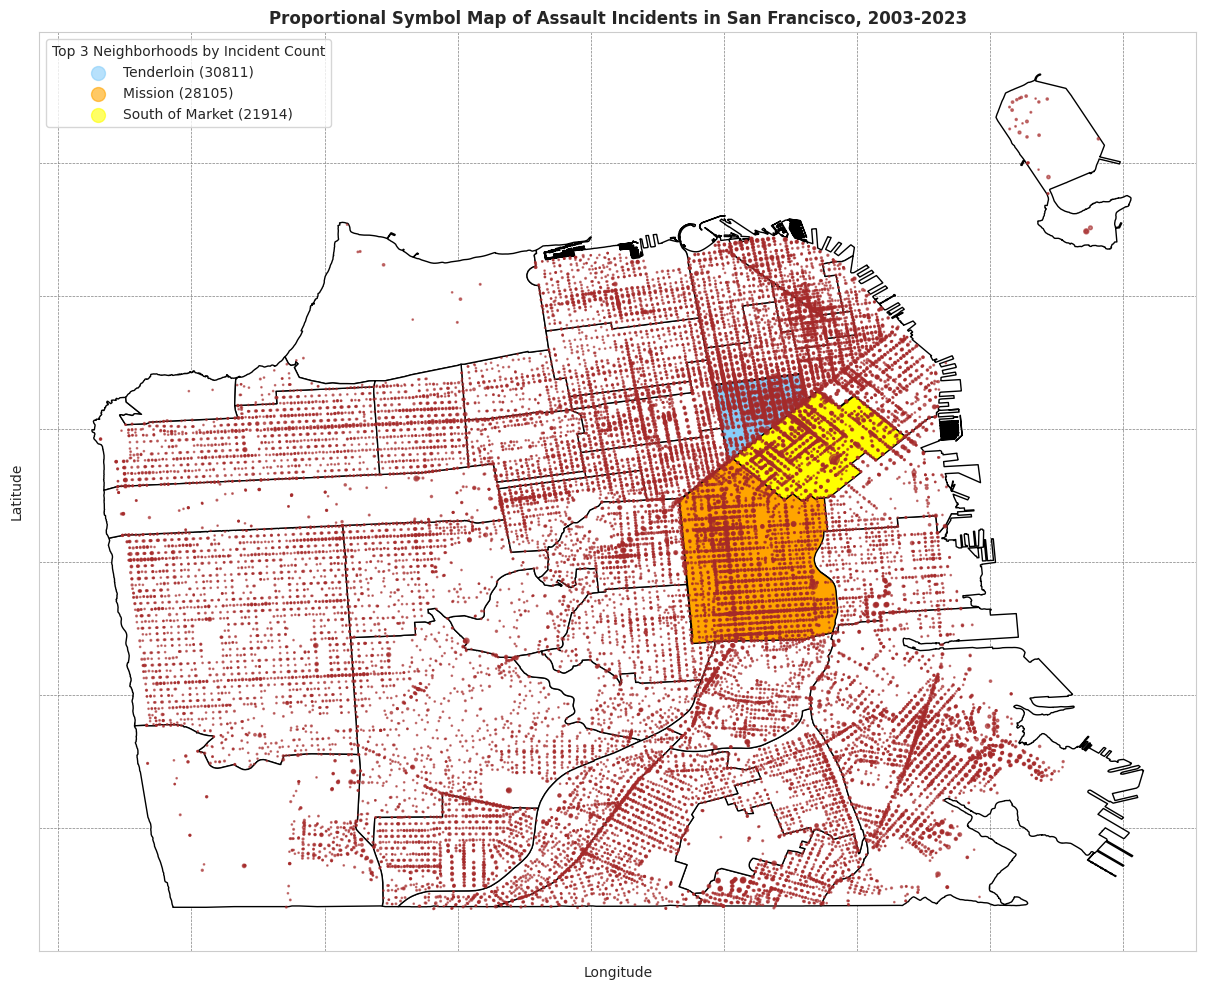

In [ ]:
# proportional Symbol Map of Assault incidents , all years

sf_incident_assault = sf_incident[sf_incident['Incident Category'] == "Assault"]
neighborhood_data = pd.read_csv("/content/drive/MyDrive/DATA240/project/San_Francisco_Analysis_Neighborhoods.csv") # contains the GPS bounding boxes of each neighborhood

# Converting the assault incident data to a GeoDataFrame based on latitude and longitude
gdf = gpd.GeoDataFrame(
    sf_incident_assault,
    geometry=gpd.points_from_xy(sf_incident_assault.Longitude, sf_incident_assault.Latitude)
)

# Converting the neighborhood data containing the bounding boxes of each neighborhood to a GeoDataFrame
neighborhood_gdf = gpd.GeoDataFrame(
    neighborhood_data,
    geometry=neighborhood_data['the_geom'].apply(wkt.loads)
)
neighborhood_gdf.crs = "EPSG:4326"

# Aggregating the incidents by location
location_incidents = gdf.groupby(['Latitude', 'Longitude']).size().reset_index(name='counts')
location_gdf = gpd.GeoDataFrame(location_incidents, geometry=gpd.points_from_xy(location_incidents.Longitude, location_incidents.Latitude))

# Counting the number of incidents in each neighborhood using the 'Neighborhood Name' column
neighborhood_incident_counts = sf_incident_assault['Neighborhood Name'].value_counts().rename_axis('nhood').reset_index(name='incident_count')

# Merging the incident counts with the neighborhood GeoDataFrame
neighborhood_gdf = neighborhood_gdf.merge(neighborhood_incident_counts, on='nhood', how='left')

# Defining colors to use for the top 3 neighborhoods
top_colors = ['lightskyblue', 'orange', 'yellow']

# Sorting the neighborhoods by incident count and getting the top 3, along with their respective colors
top_neighborhoods = neighborhood_gdf.sort_values(by='incident_count', ascending=False).head(3)
top_neighborhoods['color'] = top_colors[:len(top_neighborhoods)]

# Defining the size for the scatter points based on the incident counts
size = 50 * (location_gdf['counts'] / location_gdf['counts'].max()) ** 0.5

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plotting the neighborhoods with a white color
neighborhood_gdf.plot(ax=ax, color='white', edgecolor='black')

# Highlighting the top 3 neighborhoods with a different color
for color, row in zip(top_colors, top_neighborhoods.itertuples()):
    neighborhood_gdf[neighborhood_gdf['nhood'] == row.nhood].plot(ax=ax, color=color, edgecolor='black')

# Plotting the incidents as circles with the same color but with different sizes
location_gdf.plot(ax=ax, marker='o', color='brown', markersize=size, alpha=0.6)

# Adding a legend for the top 3 neighborhoods, with their respective incident counts
for color, row in zip(top_colors, top_neighborhoods.itertuples()):
    ax.scatter([], [], c=color, alpha=0.6, s=100, label=f"{row.nhood} ({int(row.incident_count)})")

ax.legend(title="Top 3 Neighborhoods by Incident Count", loc='upper left')

plt.title('Proportional Symbol Map of Assault Incidents in San Francisco, 2003-2023', weight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, which='both', color='grey', linestyle='--', linewidth=0.5)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.tight_layout()
plt.show()

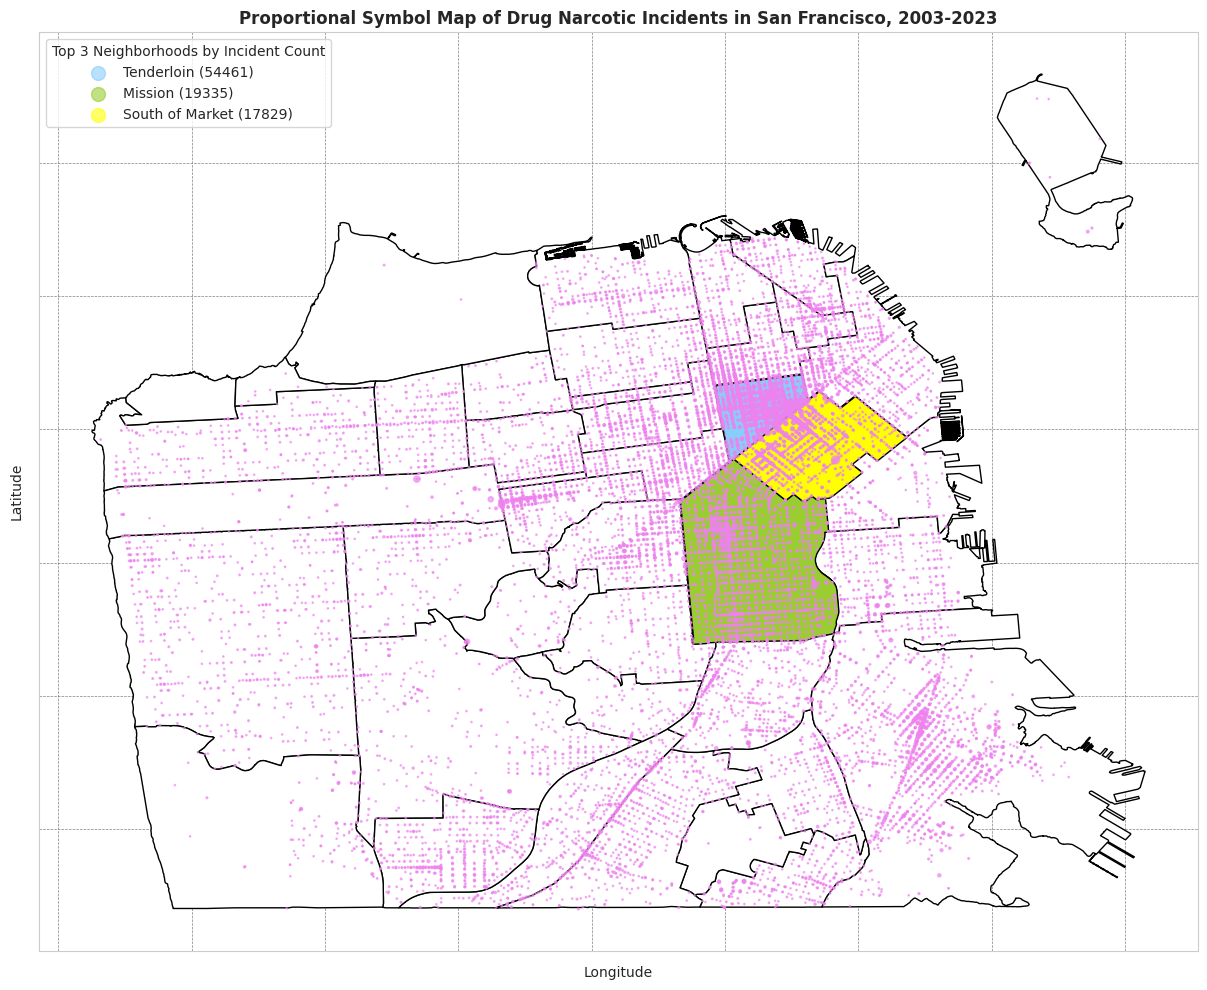

In [ ]:
# proportional Symbol Map of Drug Narcotic incidents, all years

sf_incident_drug = sf_incident[sf_incident['Incident Category'] == "Drug Narcotic"]
neighborhood_data = pd.read_csv("/content/drive/MyDrive/DATA240/project/San_Francisco_Analysis_Neighborhoods.csv") # contains the GPS bounding boxes of each neighborhood

# Converting the drug narcotic incident data to a GeoDataFrame based on latitude and longitude
gdf = gpd.GeoDataFrame(
    sf_incident_drug,
    geometry=gpd.points_from_xy(sf_incident_drug.Longitude, sf_incident_drug.Latitude)
)

# Converting the neighborhood data containing the bounding boxes of each neighborhood to a GeoDataFrame
neighborhood_gdf = gpd.GeoDataFrame(
    neighborhood_data,
    geometry=neighborhood_data['the_geom'].apply(wkt.loads)
)
neighborhood_gdf.crs = "EPSG:4326"

# Aggregating the incidents by location
location_incidents = gdf.groupby(['Latitude', 'Longitude']).size().reset_index(name='counts')
location_gdf = gpd.GeoDataFrame(location_incidents, geometry=gpd.points_from_xy(location_incidents.Longitude, location_incidents.Latitude))

# Counting the number of incidents in each neighborhood using the 'Neighborhood Name' column
neighborhood_incident_counts = sf_incident_drug['Neighborhood Name'].value_counts().rename_axis('nhood').reset_index(name='incident_count')

# Merging the incident counts with the neighborhood GeoDataFrame
neighborhood_gdf = neighborhood_gdf.merge(neighborhood_incident_counts, on='nhood', how='left')

# Defining colors to use for the top 3 neighborhoods
top_colors = ['lightskyblue', 'yellowgreen', 'yellow']

# Sorting the neighborhoods by incident count and getting the top 3, along with their respective colors
top_neighborhoods = neighborhood_gdf.sort_values(by='incident_count', ascending=False).head(3)
top_neighborhoods['color'] = top_colors[:len(top_neighborhoods)]

# Defining the size for the scatter points based on the incident counts
size = 50 * (location_gdf['counts'] / location_gdf['counts'].max()) ** 0.5

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Plotting the neighborhoods with a white color
neighborhood_gdf.plot(ax=ax, color='white', edgecolor='black')

# Highlighting the top 3 neighborhoods with a different color
for color, row in zip(top_colors, top_neighborhoods.itertuples()):
    neighborhood_gdf[neighborhood_gdf['nhood'] == row.nhood].plot(ax=ax, color=color, edgecolor='black')

# Plotting the incidents as circles with the same color but with different sizes
location_gdf.plot(ax=ax, marker='o', color='violet', markersize=size, alpha=0.6)

# Adding a legend for the top 3 neighborhoods, with their respective incident counts
for color, row in zip(top_colors, top_neighborhoods.itertuples()):
    ax.scatter([], [], c=color, alpha=0.6, s=100, label=f"{row.nhood} ({int(row.incident_count)})")

ax.legend(title="Top 3 Neighborhoods by Incident Count", loc='upper left')

plt.title('Proportional Symbol Map of Drug Narcotic Incidents in San Francisco, 2003-2023', weight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, which='both', color='grey', linestyle='--', linewidth=0.5)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.tight_layout()
plt.show()

<ipython-input-89-b13432e14017>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_incident_larceny['Month Name'] = sf_incident_larceny['Incident Month'].map(month_mapping)


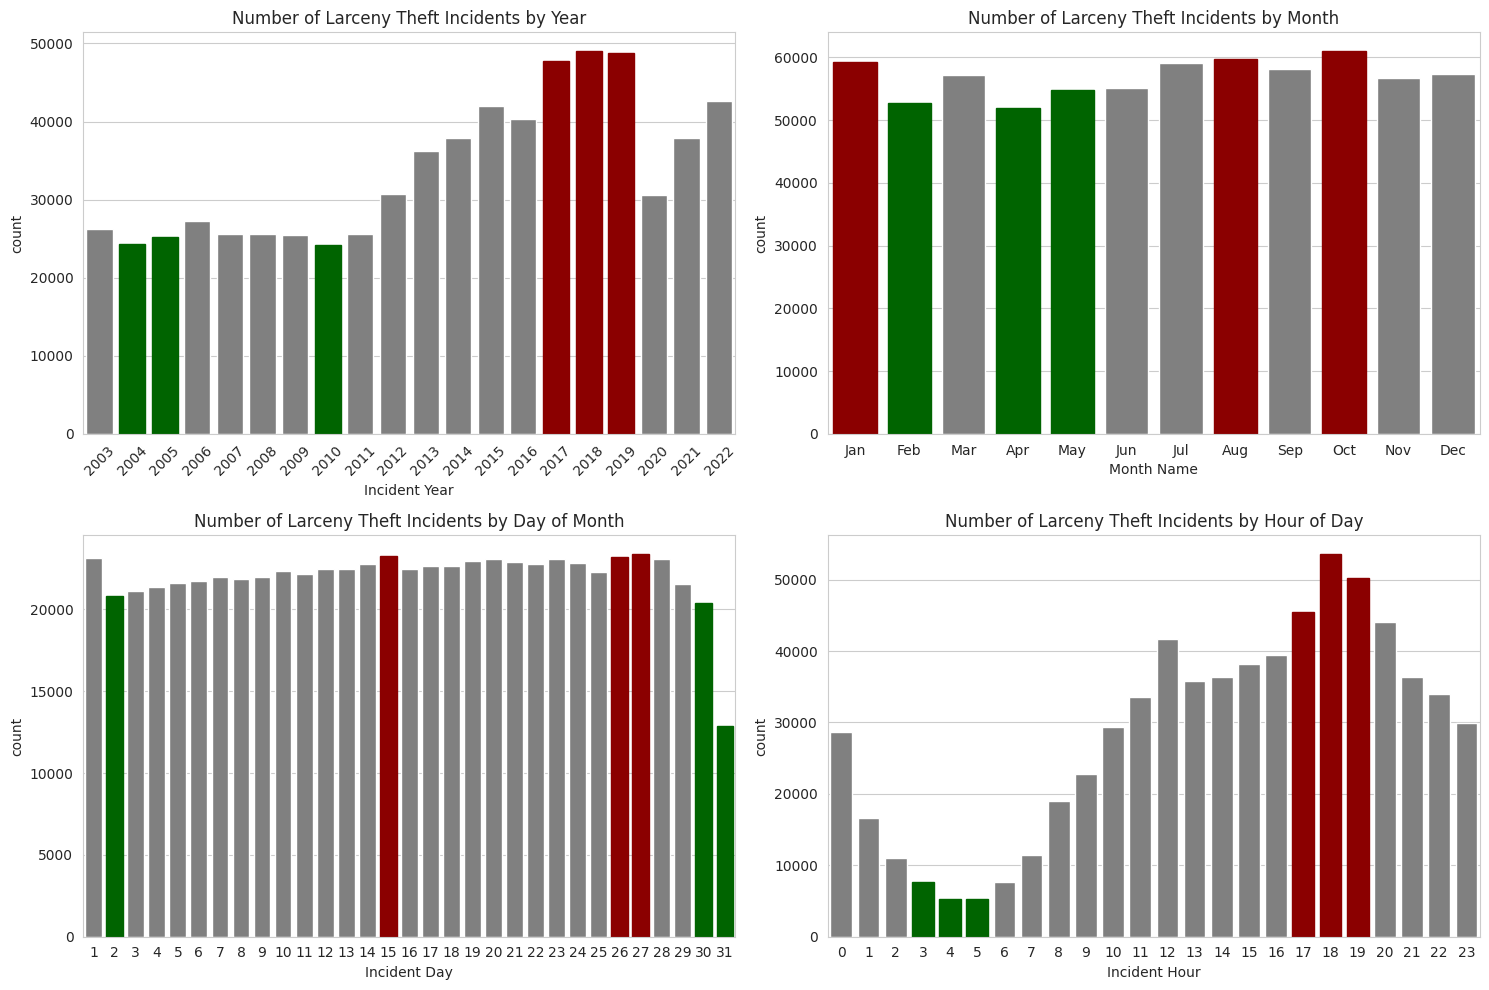

In [ ]:
# visualizing the number of incidents by year, month, day, hour

sf_incident_larceny = sf_incident[sf_incident['Incident Category'] == "Larceny Theft"]

sns.set_style("whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Function to color top 3 bars in red and bottom 3 bars in green
def color_top_bottom_3_bars(ax):
    # Getting the heights of the bars
    heights = [p.get_height() for p in ax.patches]

    # Sorting bars and getting indices of top 3 bars
    top_3_indices = sorted(range(len(heights)), key=lambda i: heights[i], reverse=True)[:3]
    for i in top_3_indices:
        ax.patches[i].set_color('#8B0000')

    # Sorting bars and getting indices of bottom 3 bars
    bottom_3_indices = sorted(range(len(heights)), key=lambda i: heights[i])[:3]
    for i in bottom_3_indices:
        ax.patches[i].set_color('#006400')

# Yearly trend
sns.countplot(
    x='Incident Year',
    data=sf_incident_larceny[sf_incident_larceny['Incident Year'] != 2023],
    ax=axs[0, 0],
    color='grey'
)

axs[0, 0].set_title('Number of Larceny Theft Incidents by Year')
axs[0, 0].tick_params(axis='x', rotation=45)
color_top_bottom_3_bars(axs[0, 0])

# Mapping of month numbers to month names
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Map the 'Incident Month' column to month names
sf_incident_larceny['Month Name'] = sf_incident_larceny['Incident Month'].map(month_mapping)

# Plot the data using 'Month Name' column
sns.countplot(x='Month Name', data=sf_incident_larceny, ax=axs[0, 1], color='grey', order=month_mapping.values())
axs[0, 1].set_title('Number of Larceny Theft Incidents by Month')
color_top_bottom_3_bars(axs[0, 1])

# Daily trend
sns.countplot(x='Incident Day', data=sf_incident_larceny, ax=axs[1, 0], color='grey')
axs[1, 0].set_title('Number of Larceny Theft Incidents by Day of Month')
color_top_bottom_3_bars(axs[1, 0])

# Hourly trend
sns.countplot(x='Incident Hour', data=sf_incident_larceny, ax=axs[1, 1], color='grey')
axs[1, 1].set_title('Number of Larceny Theft Incidents by Hour of Day')
color_top_bottom_3_bars(axs[1, 1])

plt.tight_layout()
plt.show()

<ipython-input-90-8a33d62f9dab>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_incident_assault['Month Name'] = sf_incident_assault['Incident Month'].map(month_mapping)


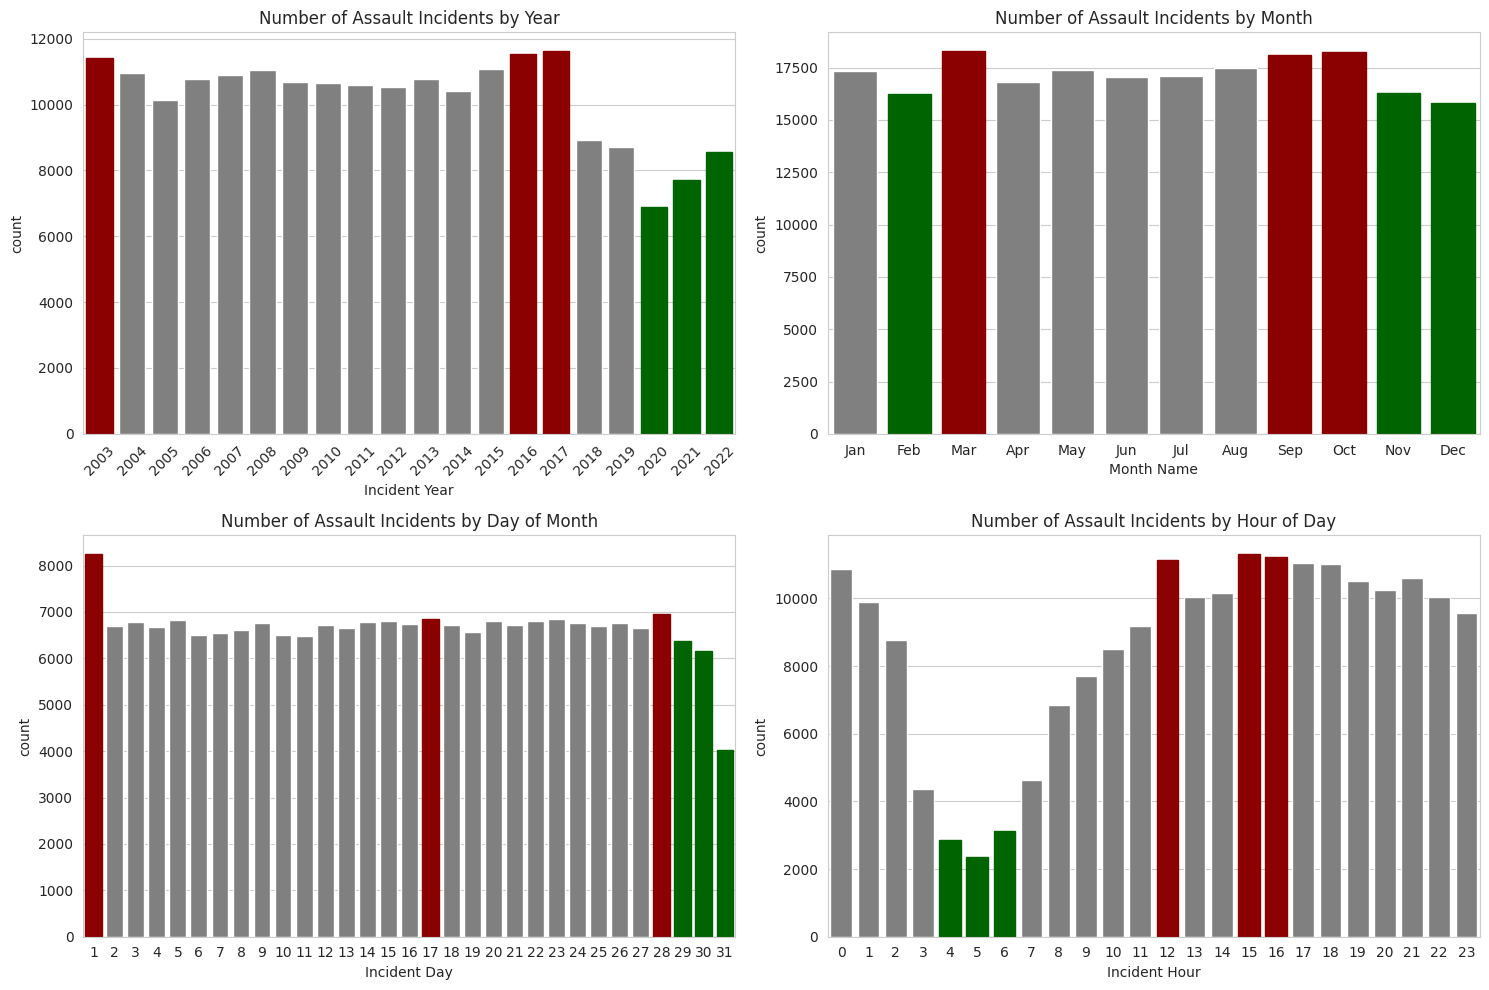

In [ ]:
# visualizing the number of incidents by year, month, day, hour

sf_incident_assault = sf_incident[sf_incident['Incident Category'] == "Assault"]

sns.set_style("whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Function to color top 3 bars in red and bottom 3 bars in green
def color_top_bottom_3_bars(ax):
    # Getting the heights of the bars
    heights = [p.get_height() for p in ax.patches]

    # Sorting bars and getting indices of top 3 bars
    top_3_indices = sorted(range(len(heights)), key=lambda i: heights[i], reverse=True)[:3]
    for i in top_3_indices:
        ax.patches[i].set_color('#8B0000')

    # Sorting bars and getting indices of bottom 3 bars
    bottom_3_indices = sorted(range(len(heights)), key=lambda i: heights[i])[:3]
    for i in bottom_3_indices:
        ax.patches[i].set_color('#006400')

# Yearly trend
sns.countplot(
    x='Incident Year',
    data=sf_incident_assault[sf_incident_assault['Incident Year'] != 2023],
    ax=axs[0, 0],
    color='grey'
)

axs[0, 0].set_title('Number of Assault Incidents by Year')
axs[0, 0].tick_params(axis='x', rotation=45)
color_top_bottom_3_bars(axs[0, 0])

# Mapping of month numbers to month names
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Map the 'Incident Month' column to month names
sf_incident_assault['Month Name'] = sf_incident_assault['Incident Month'].map(month_mapping)

# Plot the data using 'Month Name' column
sns.countplot(x='Month Name', data=sf_incident_assault, ax=axs[0, 1], color='grey', order=month_mapping.values())
axs[0, 1].set_title('Number of Assault Incidents by Month')
color_top_bottom_3_bars(axs[0, 1])

# Daily trend
sns.countplot(x='Incident Day', data=sf_incident_assault, ax=axs[1, 0], color='grey')
axs[1, 0].set_title('Number of Assault Incidents by Day of Month')
color_top_bottom_3_bars(axs[1, 0])

# Hourly trend
sns.countplot(x='Incident Hour', data=sf_incident_assault, ax=axs[1, 1], color='grey')
axs[1, 1].set_title('Number of Assault Incidents by Hour of Day')
color_top_bottom_3_bars(axs[1, 1])

plt.tight_layout()
plt.show()

<ipython-input-91-4dc8692a29b7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_incident_drug['Month Name'] = sf_incident_drug['Incident Month'].map(month_mapping)


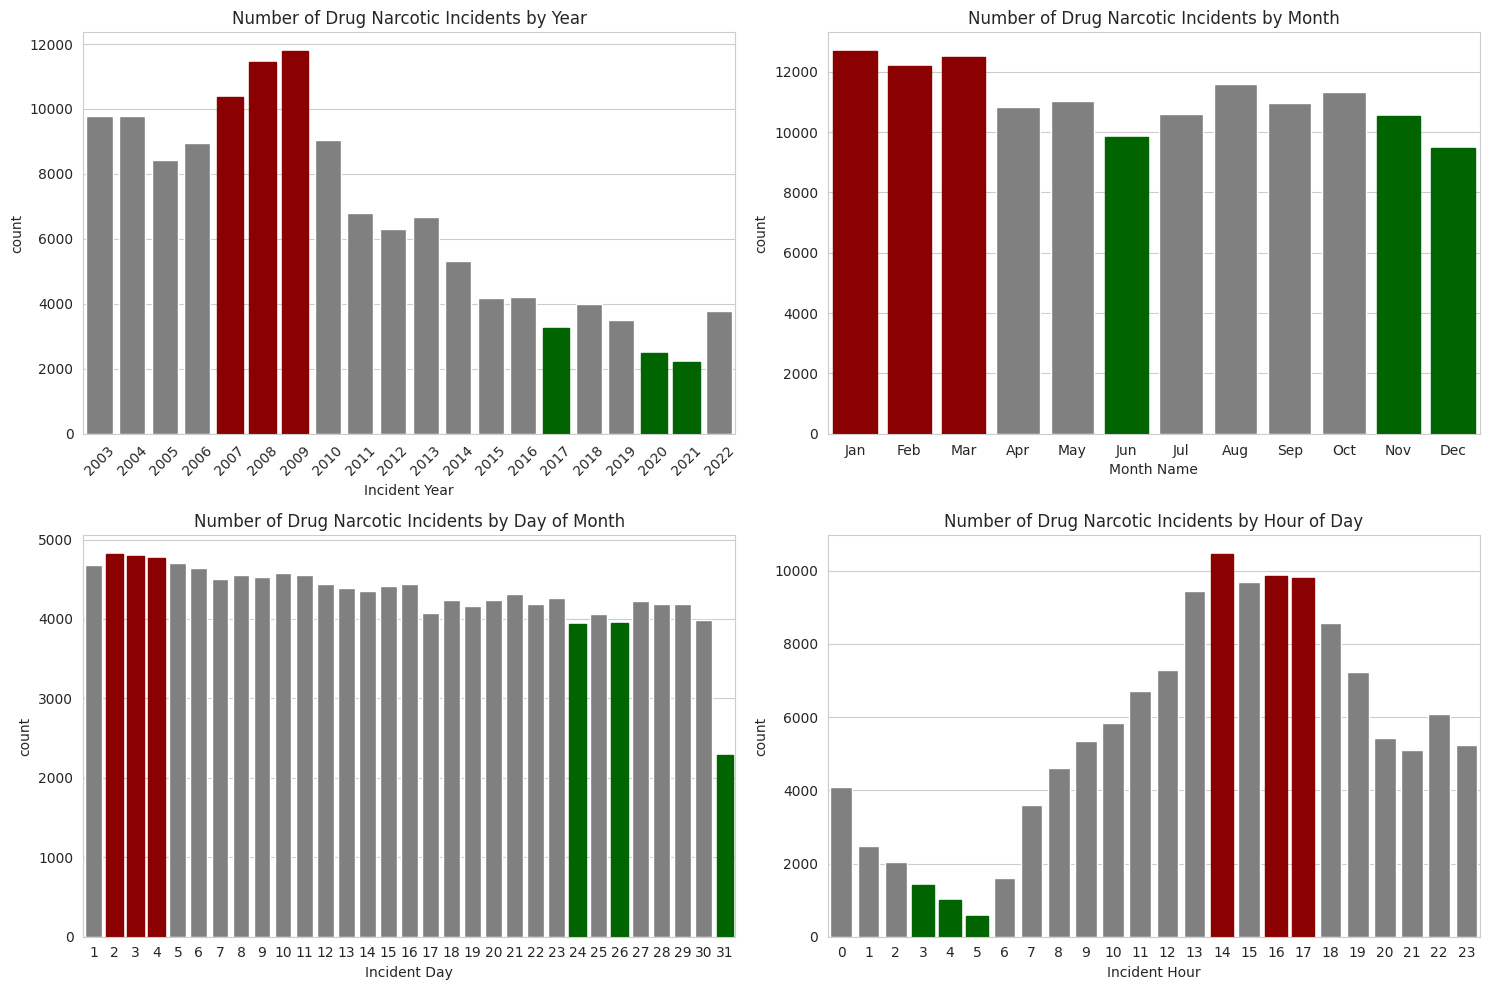

In [ ]:
# visualizing the number of incidents by year, month, day, hour

sf_incident_drug = sf_incident[sf_incident['Incident Category'] == "Drug Narcotic"]

sns.set_style("whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Function to color top 3 bars in red and bottom 3 bars in green
def color_top_bottom_3_bars(ax):
    # Getting the heights of the bars
    heights = [p.get_height() for p in ax.patches]

    # Sorting bars and getting indices of top 3 bars
    top_3_indices = sorted(range(len(heights)), key=lambda i: heights[i], reverse=True)[:3]
    for i in top_3_indices:
        ax.patches[i].set_color('#8B0000')

    # Sorting bars and getting indices of bottom 3 bars
    bottom_3_indices = sorted(range(len(heights)), key=lambda i: heights[i])[:3]
    for i in bottom_3_indices:
        ax.patches[i].set_color('#006400')

# Yearly trend
sns.countplot(
    x='Incident Year',
    data=sf_incident_drug[sf_incident_drug['Incident Year'] != 2023],
    ax=axs[0, 0],
    color='grey'
)

axs[0, 0].set_title('Number of Drug Narcotic Incidents by Year')
axs[0, 0].tick_params(axis='x', rotation=45)
color_top_bottom_3_bars(axs[0, 0])

# Mapping of month numbers to month names
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Map the 'Incident Month' column to month names
sf_incident_drug['Month Name'] = sf_incident_drug['Incident Month'].map(month_mapping)

# Plot the data using 'Month Name' column
sns.countplot(x='Month Name', data=sf_incident_drug, ax=axs[0, 1], color='grey', order=month_mapping.values())
axs[0, 1].set_title('Number of Drug Narcotic Incidents by Month')
color_top_bottom_3_bars(axs[0, 1])

# Daily trend
sns.countplot(x='Incident Day', data=sf_incident_drug, ax=axs[1, 0], color='grey')
axs[1, 0].set_title('Number of Drug Narcotic Incidents by Day of Month')
color_top_bottom_3_bars(axs[1, 0])

# Hourly trend
sns.countplot(x='Incident Hour', data=sf_incident_drug, ax=axs[1, 1], color='grey')
axs[1, 1].set_title('Number of Drug Narcotic Incidents by Hour of Day')
color_top_bottom_3_bars(axs[1, 1])

plt.tight_layout()
plt.show()

In [ ]:
# adding a 'YearMonth' column for easier aggregation
sf_incident_larceny['YearMonth'] = sf_incident_larceny['Incident Date'].dt.to_period('M')

# Grouping the data by month
monthly_data_larceny = sf_incident_larceny.groupby('YearMonth').agg({
    'Incident Code': 'count',
    'Inflation Rate': 'mean',
    'Unemployment Rate': 'mean',
    'Median Housing Price': 'mean'
}).reset_index()

# Converting 'YearMonth' back to datetime format for plotting
monthly_data_larceny['YearMonth'] = monthly_data_larceny['YearMonth'].dt.to_timestamp()

# Renaming columns for clarity
monthly_data_larceny = monthly_data_larceny.rename(columns={'Incident Code': 'Number of Incidents'}) # counting the total number of incident codes as the number of incidents

# Sorting the data by 'YearMonth' to ensure the plot is in chronological order
monthly_data_larceny_sorted = monthly_data_larceny.sort_values(by='YearMonth')

# Converting 'YearMonth' back to datetime for plotting
monthly_data_larceny_sorted['YearMonth'] = pd.to_datetime(monthly_data_larceny_sorted['YearMonth'].astype(str))

# Resampling the data to monthly frequency
monthly_larceny_resampled = sf_incident_larceny.resample('M', on='Incident Date').mean()

# Resetting index to get 'Incident Date' back as a column
monthly_larceny_resampled.reset_index(inplace=True)


<ipython-input-92-f6028f7c5daf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_incident_larceny['YearMonth'] = sf_incident_larceny['Incident Date'].dt.to_period('M')
<ipython-input-92-f6028f7c5daf>:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_larceny_resampled = sf_incident_larceny.resample('M', on='Incident Date').mean()


In [ ]:
# adding a 'YearMonth' column for easier aggregation
sf_incident_assault['YearMonth'] = sf_incident_assault['Incident Date'].dt.to_period('M')

# Grouping the data by month
monthly_data_assault = sf_incident_assault.groupby('YearMonth').agg({
    'Incident Code': 'count',
    'Inflation Rate': 'mean',
    'Unemployment Rate': 'mean',
    'Median Housing Price': 'mean'
}).reset_index()

# Converting 'YearMonth' back to datetime format for plotting
monthly_data_assault['YearMonth'] = monthly_data_assault['YearMonth'].dt.to_timestamp()

# Renaming columns for clarity
monthly_data_assault = monthly_data_assault.rename(columns={'Incident Code': 'Number of Incidents'}) # counting the total number of incident codes as the number of incidents

# Sorting the data by 'YearMonth' to ensure the plot is in chronological order
monthly_data_assault_sorted = monthly_data_assault.sort_values(by='YearMonth')

# Converting 'YearMonth' back to datetime for plotting
monthly_data_assault_sorted['YearMonth'] = pd.to_datetime(monthly_data_assault_sorted['YearMonth'].astype(str))

# Resampling the data to monthly frequency
monthly_assault_resampled = sf_incident_assault.resample('M', on='Incident Date').mean()

# Resetting index to get 'Incident Date' back as a column
monthly_assault_resampled.reset_index(inplace=True)


<ipython-input-93-dd99164823eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_incident_assault['YearMonth'] = sf_incident_assault['Incident Date'].dt.to_period('M')
<ipython-input-93-dd99164823eb>:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_assault_resampled = sf_incident_assault.resample('M', on='Incident Date').mean()


In [ ]:
# adding a 'YearMonth' column for easier aggregation
sf_incident_drug['YearMonth'] = sf_incident_drug['Incident Date'].dt.to_period('M')

# Grouping the data by month
monthly_data_drug = sf_incident_drug.groupby('YearMonth').agg({
    'Incident Code': 'count',
    'Inflation Rate': 'mean',
    'Unemployment Rate': 'mean',
    'Median Housing Price': 'mean'
}).reset_index()

# Converting 'YearMonth' back to datetime format for plotting
monthly_data_drug['YearMonth'] = monthly_data_drug['YearMonth'].dt.to_timestamp()

# Renaming columns for clarity
monthly_data_drug = monthly_data_drug.rename(columns={'Incident Code': 'Number of Incidents'}) # counting the total number of incident codes as the number of incidents

# Sorting the data by 'YearMonth' to ensure the plot is in chronological order
monthly_data_drug_sorted = monthly_data_drug.sort_values(by='YearMonth')

# Converting 'YearMonth' back to datetime for plotting
monthly_data_drug_sorted['YearMonth'] = pd.to_datetime(monthly_data_drug_sorted['YearMonth'].astype(str))

# Resampling the data to monthly frequency
monthly_drug_resampled = sf_incident_drug.resample('M', on='Incident Date').mean()

# Resetting index to get 'Incident Date' back as a column
monthly_drug_resampled.reset_index(inplace=True)


<ipython-input-94-381260ccf09d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_incident_drug['YearMonth'] = sf_incident_drug['Incident Date'].dt.to_period('M')
<ipython-input-94-381260ccf09d>:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_drug_resampled = sf_incident_drug.resample('M', on='Incident Date').mean()


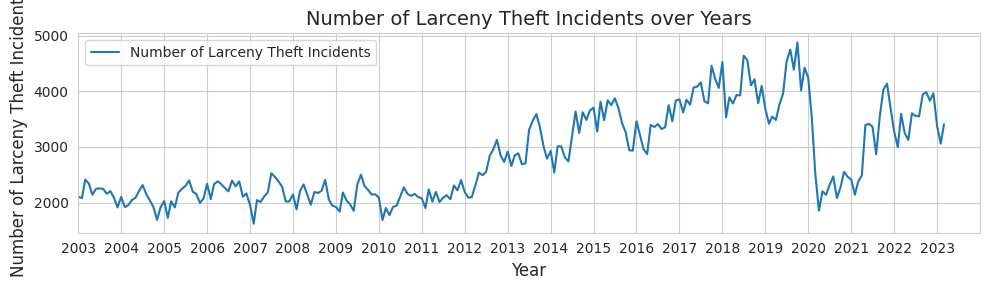

In [ ]:
plt.figure(figsize=(10, 3))

sns.lineplot(x='YearMonth', y='Number of Incidents', data=monthly_data_larceny_sorted, label='Number of Larceny Theft Incidents')
plt.title('Number of Larceny Theft Incidents over Years', fontsize=14)
plt.ylabel('Number of Larceny Theft Incidents', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.tick_params(labelsize=10)

# Adjust x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())  # Yearly ticks
ax.xaxis.set_major_formatter(DateFormatter("%Y"))  # Display only the year
ax.set_xlim(pd.Timestamp('2003-01-01'), pd.Timestamp('2023-12-31'))  # Exclude 2002 and 2024

plt.tight_layout()
plt.show()

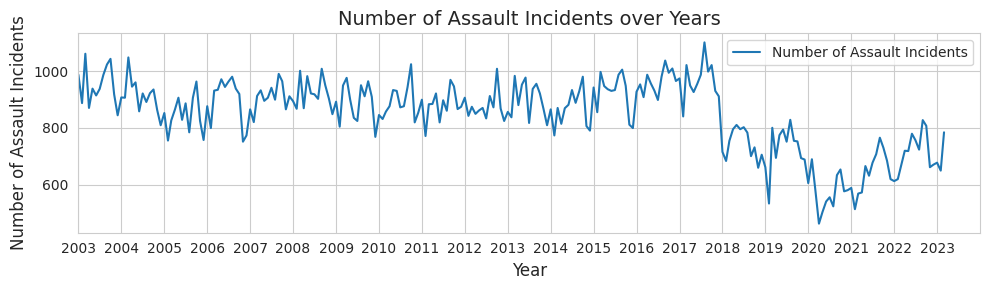

In [ ]:
plt.figure(figsize=(10, 3))

sns.lineplot(x='YearMonth', y='Number of Incidents', data=monthly_data_assault_sorted, label='Number of Assault Incidents')
plt.title('Number of Assault Incidents over Years', fontsize=14)
plt.ylabel('Number of Assault Incidents', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.tick_params(labelsize=10)

# Adjust x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())  # Yearly ticks
ax.xaxis.set_major_formatter(DateFormatter("%Y"))  # Display only the year
ax.set_xlim(pd.Timestamp('2003-01-01'), pd.Timestamp('2023-12-31'))  # Exclude 2002 and 2024

plt.tight_layout()
plt.show()

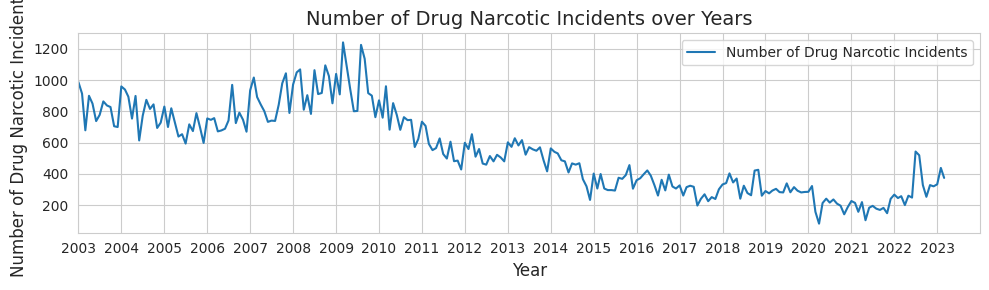

In [ ]:
plt.figure(figsize=(10, 3))

sns.lineplot(x='YearMonth', y='Number of Incidents', data=monthly_data_drug_sorted, label='Number of Drug Narcotic Incidents')
plt.title('Number of Drug Narcotic Incidents over Years', fontsize=14)
plt.ylabel('Number of Drug Narcotic Incidents', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.tick_params(labelsize=10)

# Adjust x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())  # Yearly ticks
ax.xaxis.set_major_formatter(DateFormatter("%Y"))  # Display only the year
ax.set_xlim(pd.Timestamp('2003-01-01'), pd.Timestamp('2023-12-31'))  # Exclude 2002 and 2024

plt.tight_layout()
plt.show()

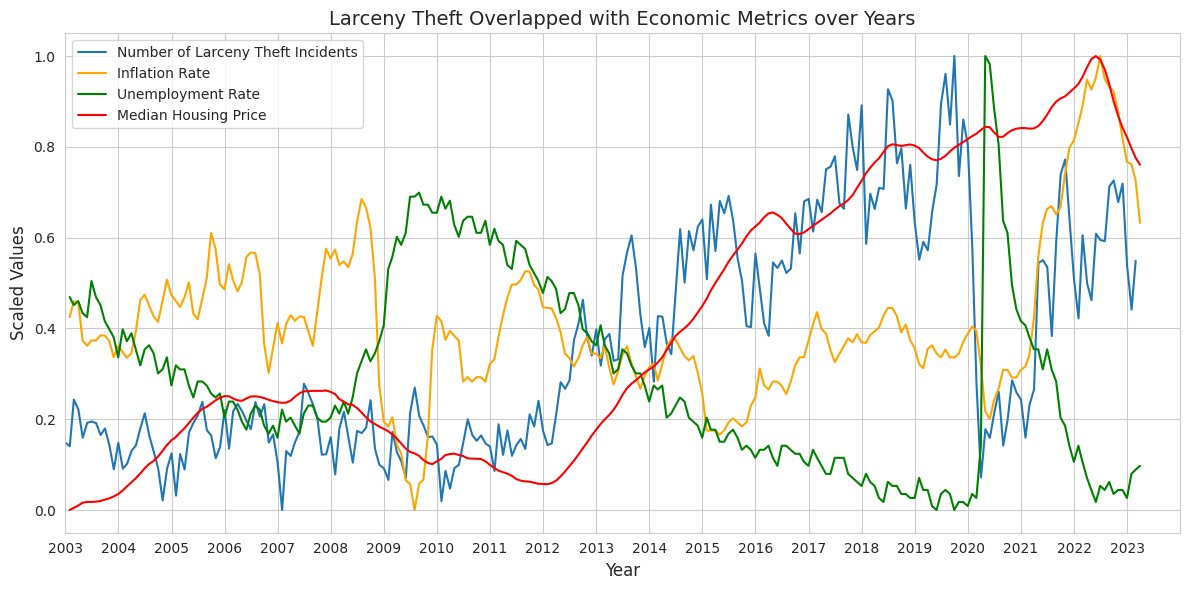

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMax scaler to put all the features y-values on one plot
scaler = MinMaxScaler()

# Scale the columns
monthly_data_larceny_sorted['Number of Larceny Theft Incidents Scaled'] = scaler.fit_transform(monthly_data_larceny_sorted[['Number of Incidents']])
monthly_resampled['Inflation Rate Scaled'] = scaler.fit_transform(monthly_resampled[['Inflation Rate']])
monthly_resampled['Unemployment Rate Scaled'] = scaler.fit_transform(monthly_resampled[['Unemployment Rate']])
monthly_resampled['Median Housing Price Scaled'] = scaler.fit_transform(monthly_resampled[['Median Housing Price']])

plt.figure(figsize=(12, 6))

# Plot each metric
sns.lineplot(x='YearMonth', y='Number of Larceny Theft Incidents Scaled', data=monthly_data_larceny_sorted, label='Number of Larceny Theft Incidents')
sns.lineplot(x='Incident Date', y='Inflation Rate Scaled', data=monthly_resampled, color='orange', label='Inflation Rate')
sns.lineplot(x='Incident Date', y='Unemployment Rate Scaled', data=monthly_resampled, color='green', label='Unemployment Rate')
sns.lineplot(x='Incident Date', y='Median Housing Price Scaled', data=monthly_resampled, color='red', label='Median Housing Price')

# Adding title and labels
plt.title('Larceny Theft Overlapped with Economic Metrics over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Scaled Values', fontsize=12)
plt.tick_params(labelsize=10)
plt.legend()

# Adjusting the x-axis to display only years with 1-year step and exclude 2002 and 2024
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())  # Setting major ticks to yearly
ax.xaxis.set_major_formatter(DateFormatter("%Y"))  # Displaying only the year

# Set x-axis limits
start_date = pd.Timestamp('2003-01-01')
end_date = pd.Timestamp('2023-12-31')

ax.set_xlim(start_date, end_date)

plt.tight_layout()
plt.show()


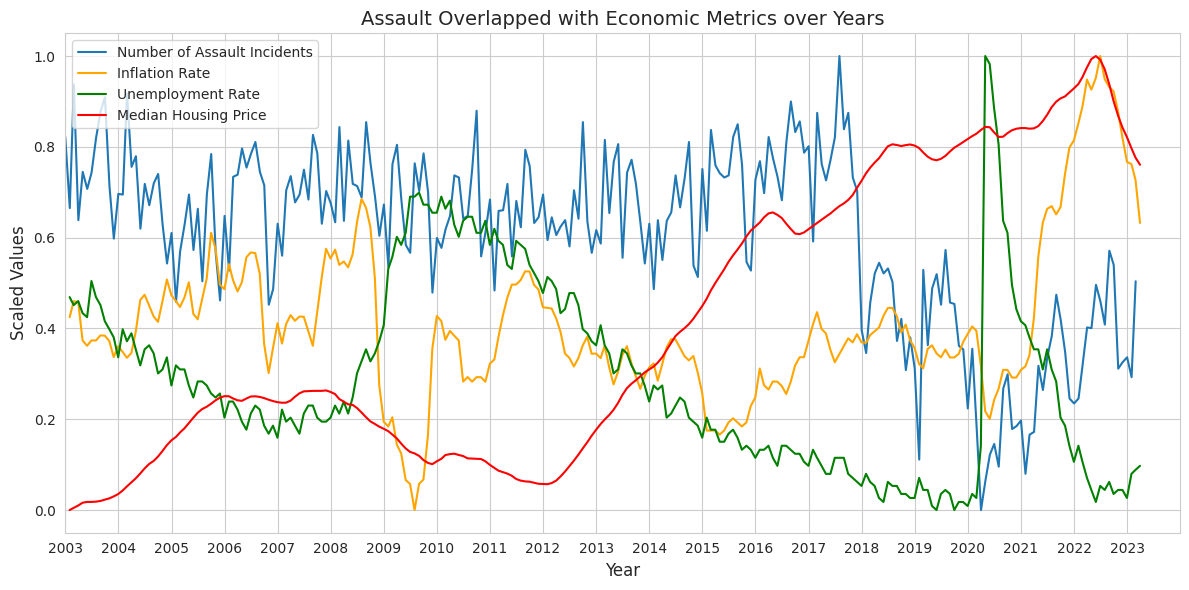

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMax scaler to put all the features y-values on one plot
scaler = MinMaxScaler()

# Scale the columns
monthly_data_assault_sorted['Number of Assault Incidents Scaled'] = scaler.fit_transform(monthly_data_assault_sorted[['Number of Incidents']])
monthly_resampled['Inflation Rate Scaled'] = scaler.fit_transform(monthly_resampled[['Inflation Rate']])
monthly_resampled['Unemployment Rate Scaled'] = scaler.fit_transform(monthly_resampled[['Unemployment Rate']])
monthly_resampled['Median Housing Price Scaled'] = scaler.fit_transform(monthly_resampled[['Median Housing Price']])

plt.figure(figsize=(12, 6))

# Plot each metric
sns.lineplot(x='YearMonth', y='Number of Assault Incidents Scaled', data=monthly_data_assault_sorted, label='Number of Assault Incidents')
sns.lineplot(x='Incident Date', y='Inflation Rate Scaled', data=monthly_resampled, color='orange', label='Inflation Rate')
sns.lineplot(x='Incident Date', y='Unemployment Rate Scaled', data=monthly_resampled, color='green', label='Unemployment Rate')
sns.lineplot(x='Incident Date', y='Median Housing Price Scaled', data=monthly_resampled, color='red', label='Median Housing Price')

# Adding title and labels
plt.title('Assault Overlapped with Economic Metrics over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Scaled Values', fontsize=12)
plt.tick_params(labelsize=10)
plt.legend(loc='upper left')

# Adjusting the x-axis to display only years with 1-year step and exclude 2002 and 2024
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())  # Setting major ticks to yearly
ax.xaxis.set_major_formatter(DateFormatter("%Y"))  # Displaying only the year

# Set x-axis limits
start_date = pd.Timestamp('2003-01-01')
end_date = pd.Timestamp('2023-12-31')

ax.set_xlim(start_date, end_date)

plt.tight_layout()
plt.show()


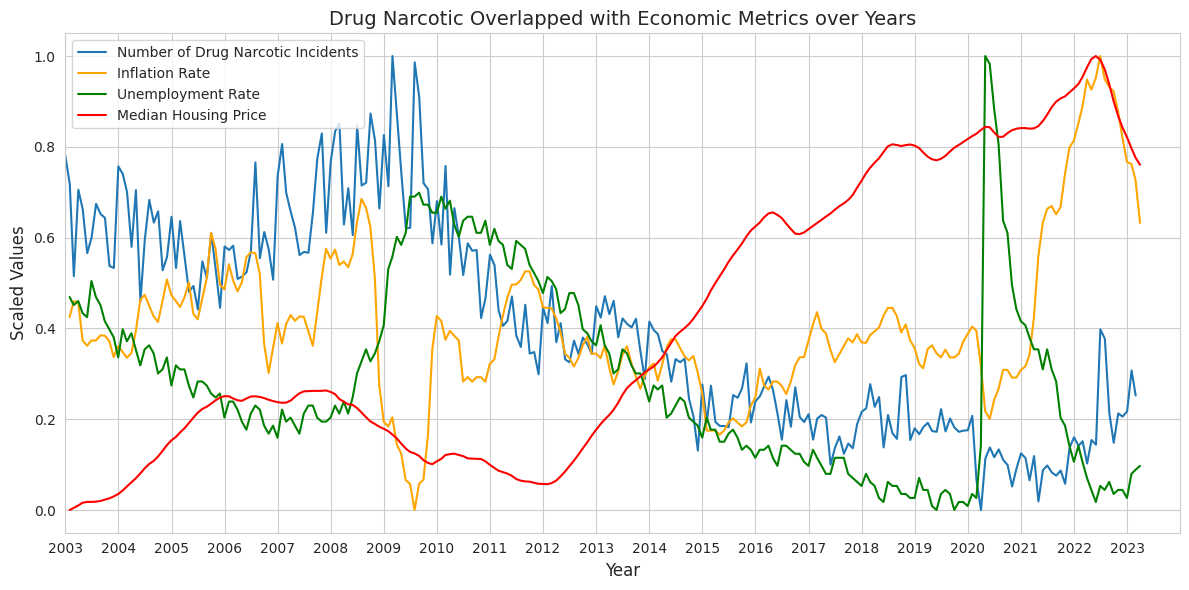

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMax scaler to put all the features y-values on one plot
scaler = MinMaxScaler()

# Scale the columns
monthly_data_drug_sorted['Number of Drug Narcotic Incidents Scaled'] = scaler.fit_transform(monthly_data_drug_sorted[['Number of Incidents']])
monthly_resampled['Inflation Rate Scaled'] = scaler.fit_transform(monthly_resampled[['Inflation Rate']])
monthly_resampled['Unemployment Rate Scaled'] = scaler.fit_transform(monthly_resampled[['Unemployment Rate']])
monthly_resampled['Median Housing Price Scaled'] = scaler.fit_transform(monthly_resampled[['Median Housing Price']])

plt.figure(figsize=(12, 6))

# Plot each metric
sns.lineplot(x='YearMonth', y='Number of Drug Narcotic Incidents Scaled', data=monthly_data_drug_sorted, label='Number of Drug Narcotic Incidents')
sns.lineplot(x='Incident Date', y='Inflation Rate Scaled', data=monthly_resampled, color='orange', label='Inflation Rate')
sns.lineplot(x='Incident Date', y='Unemployment Rate Scaled', data=monthly_resampled, color='green', label='Unemployment Rate')
sns.lineplot(x='Incident Date', y='Median Housing Price Scaled', data=monthly_resampled, color='red', label='Median Housing Price')

# Adding title and labels
plt.title('Drug Narcotic Overlapped with Economic Metrics over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Scaled Values', fontsize=12)
plt.tick_params(labelsize=10)
plt.legend(loc='upper left')

# Adjusting the x-axis to display only years with 1-year step and exclude 2002 and 2024
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())  # Setting major ticks to yearly
ax.xaxis.set_major_formatter(DateFormatter("%Y"))  # Displaying only the year

# Set x-axis limits
start_date = pd.Timestamp('2003-01-01')
end_date = pd.Timestamp('2023-12-31')

ax.set_xlim(start_date, end_date)

plt.tight_layout()
plt.show()
